## Exploratory Data Analysis on New York Air Quality Data
by:<br/>
* Okeugo Chidi Nzubechi (me)
* Azeez Babatunde Abiodun
* Ajibola Sunday

##### Data source: https://data.cityofnewyork.us/Environment/Air-Quality/c3uy-2p5r/about_data#

Data Provided By:<br/>
Department of Health and Mental Hygiene (DOHMH)<br/>
<br/>
Dataset contains information on New York City air quality surveillance data.


<br/>

### Problem statement<br/>
While all people are exposed to air pollutants, pollutant emissions, levels of exposure, and population vulnerability vary across neighborhoods. Given that exposures to common air pollutants have been linked to respiratory and cardiovascular diseases, cancers and premature deaths, it is important to understand the levels and the impacts of these pollutants across time and NYC geographies 

### Objectives<br/>
* To outline the common pollutants impacting air quality and health in NY
* To analyze the level of air pollutants across time, seasons and boroughs in New York
* To compare average pollutant values in New York with WHO thresholds
* To analyze the pollutants' impacts on health across time and boroughs in New York

#### BRIEF SUMMARY OF AIR POLLUTANTS DISCUSSED IN THIS ANALYSIS
There are five pollutants discussed in this datasheet which are;

NITROGEN DIOXIDE (NO2):- This is a gaseous air pollutant that forms when fossil fuels like coal, oil, methane gas (natural gas), or diesel are burned at high temperatures. Exposure to NO2 causes range of harmful effects on the lungs such as coughing, wheezing, reduced lung function, inflammation of airways, asthma attacks and many more.

FINE PARTICLES (PM 2.5):- They are microscopic particles of solid or liquid state that is suspended in air. They can also be called particulate matter (PM) whose size when less than 10 micrometers in diameter pose the greatest health problems, because they can get deep into your lungs, and the bloodstream causing premature death in people with heart or lung disease. It also cause non-fatal heart attacks, irregular heartbeat, aggravated asthma and many more.

OZONE (O3):- It is a highly reactive gas composed of three oxygen atoms. It exists both naturally and as a result of human activities. Ozone has two properties of interest to human health. First, it absorbs UV light, reducing human exposure to harmful UV radiation that causes skin cancer and cataracts. Second, when inhaled, it reacts chemically with many biological molecules in the respiratory tract, leading to a number of adverse health effects.

FORMALDEHYDE:- This is a highly toxic systemic poison that can be absorbed by inhalling polluted air. Inhalation of this compound cause severe respiratory tract and skin irritation, dizziness and/or suffocation.

BENZENE:- Inhalation of this compound causes harmful effects on the bone marrow and decrease in the red blood cells leading to anemia.

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
df = pd.read_csv('air_quality.csv')
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


In [4]:
#get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


In [5]:
#check distribution of null values 
df.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

In [6]:
#make a copy of data and drop 'Unique ID' and 'Message' columns
df1 = df.copy().drop(['Message', 'Unique ID'], axis=1)
df1

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3
1,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2
2,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6
3,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0
4,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1
...,...,...,...,...,...,...,...,...,...,...
18020,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9
18021,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7
18022,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4
18023,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8


In [7]:
df1.shape

(18025, 10)

In [8]:
#convert start_date column dtype to datetime
df1['Start_Date'] = pd.to_datetime(df1['Start_Date'])

In [9]:
# extract the year from start_date and create a start_year column
df1['Start_year'] = df1['Start_Date'].dt.year

In [10]:
'''
According to research there are five boroughs in New York and they are illustrated by the numbers that begins Geo Join ID
i.e any Geo ID that begins with 1 is Bronx Borough, 2 is for Brooklyn, 3 is for Manhattan etc.
Therefore we will categorize the geo join ID by their borough under the a new column below'''


# create a function to categorize the different Geo Join ID into boroughs
def borough_types(b):
    if str(b).startswith('1'):
        return'Bronx'
    elif str(b).startswith('2'):
        return'Brooklyn'
    elif str(b).startswith('3'):
        return'Manhattan'
    elif str(b).startswith('4'):
        return 'Queens'
    elif str(b).startswith('5'):
        return 'Staten_island'
    else:
        return 'unknown'

<img src ='nyc_bou_name.jpeg' width="520"/>
<img src = 'nyc_bou_code.jpeg' width="500"/>

In [11]:
#apply the above function to 'Geo Join ID' column and save the result as column Borough_name 
df1['Borough_name'] = df1['Geo Join ID'].apply(borough_types)

In [12]:
df1.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
0,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,2015-01-01,0.3,2015,Queens
1,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,2015-01-01,1.2,2015,Brooklyn
2,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,2011-12-01,8.6,2011,Brooklyn
3,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,2011-12-01,8.0,2011,Queens
4,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,2022-06-01,6.1,2022,Queens


In [13]:
#get the value counts of the different boroughs
df1['Borough_name'].value_counts()

Manhattan        4543
Brooklyn         4449
Queens           4301
Bronx            3345
Staten_island    1378
unknown             9
Name: Borough_name, dtype: int64

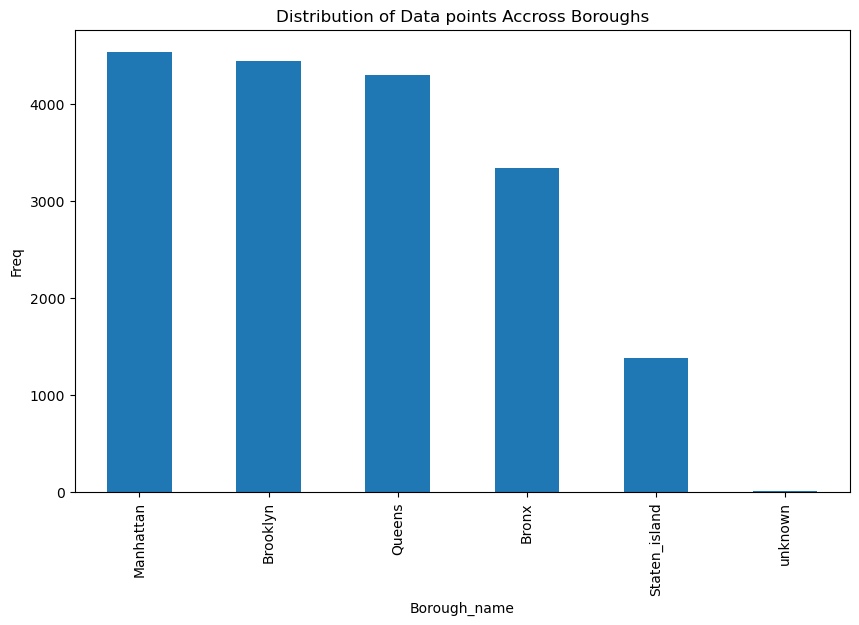

In [14]:
#plotting bar chart to show the distribution of data points accross boroughs
plt.figure(figsize=(10,6))
df1['Borough_name'].value_counts().plot(kind="bar")
plt.title("Distribution of Data points Accross Boroughs")
plt.xlabel("Borough_name")
plt.ylabel("Freq")
plt.xticks(rotation=90)
plt.show()

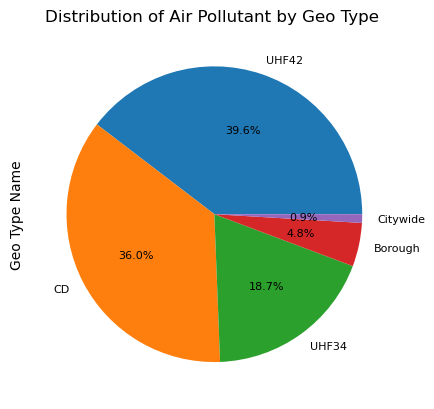

In [15]:
#To create pie chart showing distribution of air pollutant by Geo Type

df1['Geo Type Name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=360, fontsize=8)
plt.title('Distribution of Air Pollutant by Geo Type ')
plt.show()

In [16]:
#print out the different parameters to analyze
for i in df1['Name'].unique():
    print(i)

Boiler Emissions- Total SO2 Emissions
Fine particles (PM 2.5)
Nitrogen dioxide (NO2)
Asthma emergency department visits due to PM2.5
Annual vehicle miles traveled
Respiratory hospitalizations due to PM2.5 (age 20+)
Ozone (O3)
Asthma hospitalizations due to Ozone
Boiler Emissions- Total NOx Emissions
Boiler Emissions- Total PM2.5 Emissions
Outdoor Air Toxics - Formaldehyde
Asthma emergency departments visits due to Ozone
Cardiovascular hospitalizations due to PM2.5 (age 40+)
Cardiac and respiratory deaths due to Ozone
Deaths due to PM2.5
Outdoor Air Toxics - Benzene
Annual vehicle miles traveled (trucks)
Annual vehicle miles traveled (cars)


In [17]:
'''
Basically, there are five major air polutants according to this data which are
Nitrogen dioxide(NO2)
Fine Particles(PM 2.5)
Ozone (O3)
Formaldehyde
Benzene

Every pollution impact depends on these pollutants
'''

'\nBasically, there are five major air polutants according to this data which are\nNitrogen dioxide(NO2)\nFine Particles(PM 2.5)\nOzone (O3)\nFormaldehyde\nBenzene\n\nEvery pollution impact depends on these pollutants\n'

<br/>

### Air pollutants across seasons

In [18]:
#extract records with summer and winter season time period
keywords = ['Summer', 'Winter']


seasons = df1[df1['Time Period'].str.contains('|'.join(keywords))]
#seasons

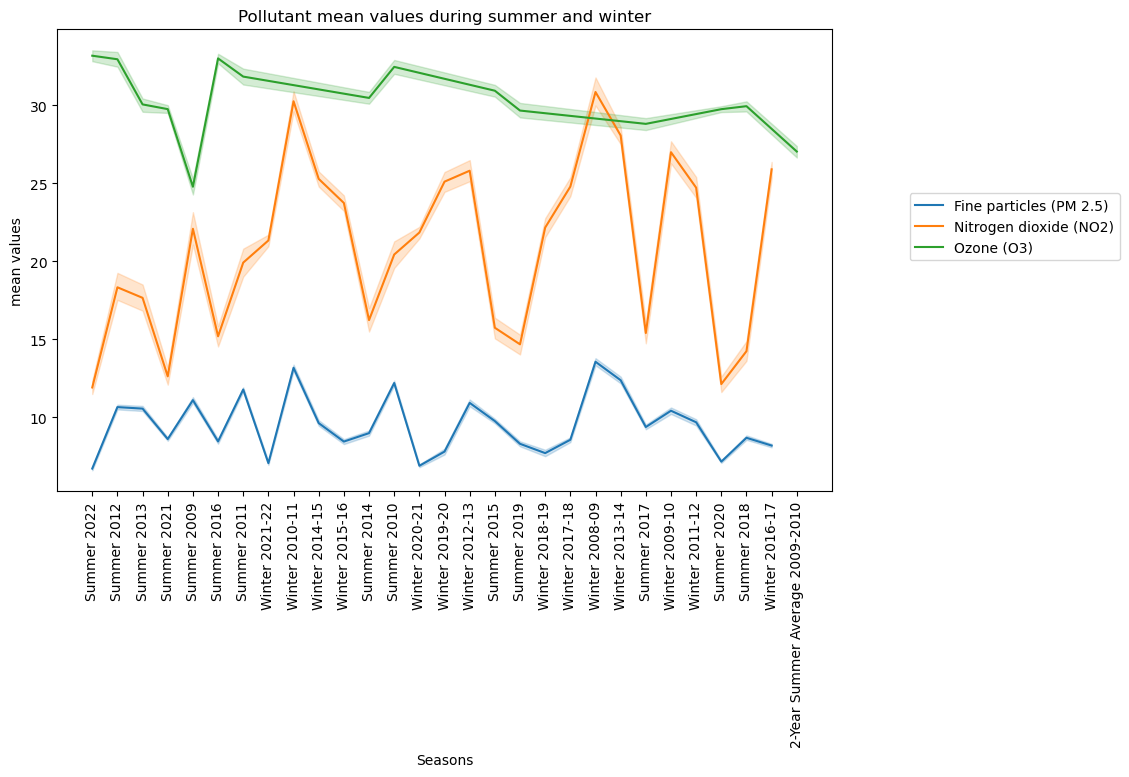

In [19]:
#visualize the trend of mean values across summer and winter seasons
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time Period', y='Data Value', hue='Name', data=seasons)
plt.title('Pollutant mean values during summer and winter')
plt.xlabel('Seasons')
plt.ylabel('mean values')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

<b>Insight:
* there is no clear pattern between Ozone level and seasons but most of its low levels are during the winter
* for Nitrogen dioxide, it records high values during the winter and low values during summer. <br/> 
Before 2021 summer, 2020 summer recorded its lowest value.
* there are no clear pattern between fine particles and the seasons


<br/>

### Analyze air pollutants across time and boroughs

In [20]:
#extract records that are not season records
annual_avg = df1[~df1['Time Period'].str.contains('|'.join(keywords))]

#annual_avg

In [21]:
#extract records with air pollutants
pollutants = ['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)',
'Ozone (O3)', 'Outdoor Air Toxics - Formaldehyde',
'Outdoor Air Toxics - Benzene']

annual_avg_pol = annual_avg[annual_avg['Name'].isin(pollutants)]

#annual_avg_pol 

In [22]:
# counts of the pollutants records
annual_avg_pol['Name'].value_counts()

Fine particles (PM 2.5)              1974
Nitrogen dioxide (NO2)               1974
Outdoor Air Toxics - Formaldehyde     203
Outdoor Air Toxics - Benzene          203
Name: Name, dtype: int64

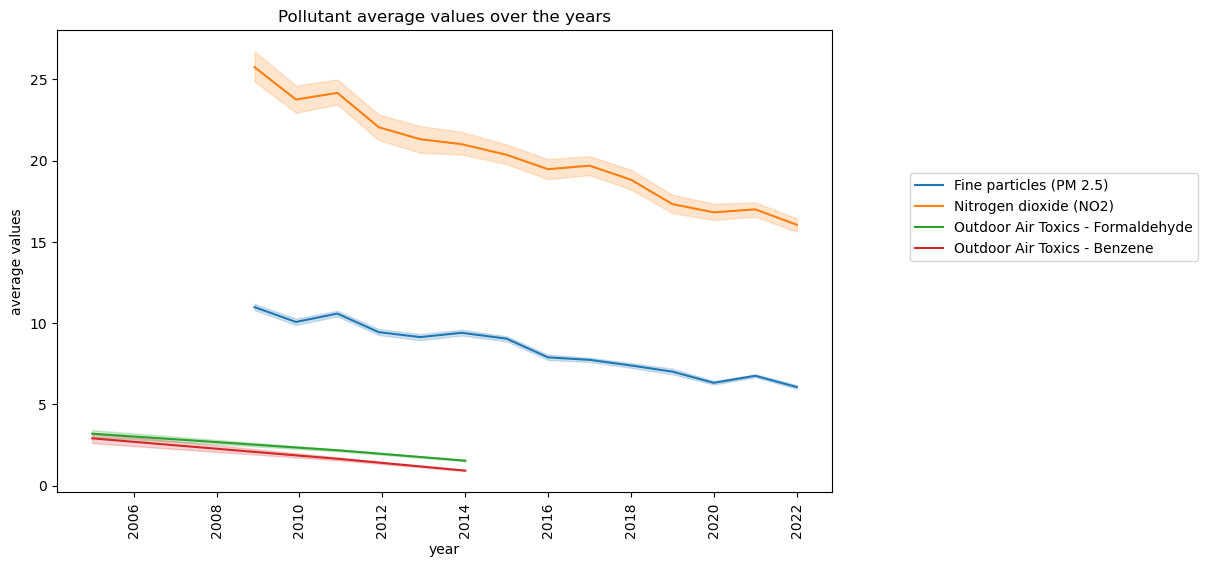

In [23]:
# plot trend of pollutants over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Name', data=annual_avg_pol)
plt.title('Pollutant average values over the years')
plt.xlabel('year')
plt.ylabel('average values')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()


<b>Insight:
* There is a steady decline in the levels(values) of the pollutants within the period

<br/>

### Nitrogen dioxide (NO2)

In [24]:
# extract records for Nitrogen dioxide 
NO2 = annual_avg_pol[annual_avg_pol['Name']=='Nitrogen dioxide (NO2)']
NO2.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
26,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2013,2012-12-01,18.6,2012,Brooklyn
27,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2017,2017-01-01,17.7,2017,Brooklyn
30,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,410.0,Rockaways,Annual Average 2017,2017-01-01,12.7,2017,Queens
31,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,410.0,Rockaways,Annual Average 2021,2021-01-01,11.4,2021,Queens
53,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,304.0,Upper West Side,Annual Average 2013,2012-12-01,26.5,2012,Manhattan


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


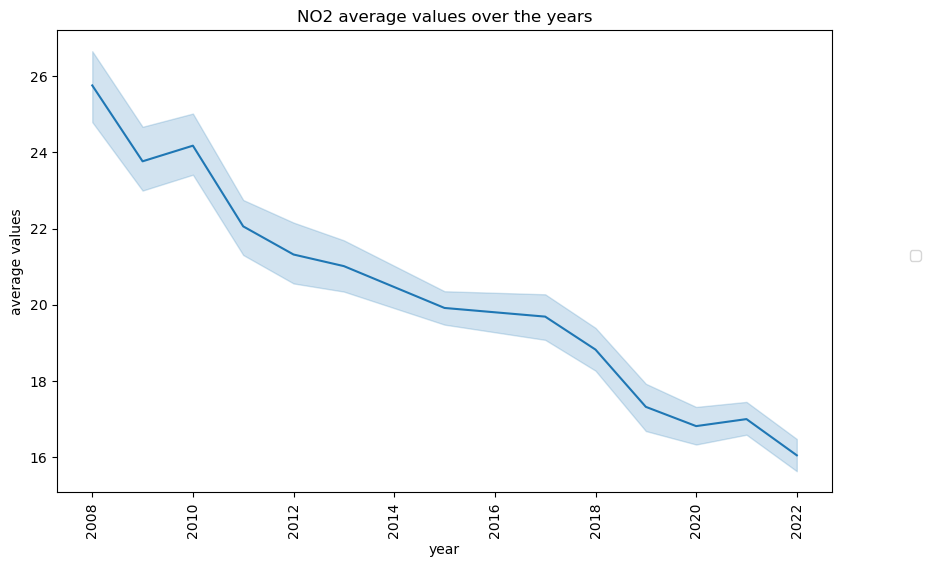

In [25]:
# plot trend of NO2 over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_year', y='Data Value', data=NO2)
plt.title('NO2 average values over the years')
plt.xlabel('year')
plt.ylabel('average values')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [26]:
NO2.groupby(['Name', 'Start_year'])['Data Value'].mean().sort_values()

Name                    Start_year
Nitrogen dioxide (NO2)  2022          16.054610
                        2020          16.820567
                        2021          17.004255
                        2019          17.325532
                        2018          18.826950
                        2017          19.691489
                        2015          19.918440
                        2013          21.015603
                        2012          21.319858
                        2011          22.057447
                        2009          23.763830
                        2010          24.173759
                        2008          25.753901
Name: Data Value, dtype: float64

<b>Insight:
* The annual average levels(values) of Nitrogen dioxide in New York steadily declined from 25.75ppb to 16.05ppb from 2008 to 2022

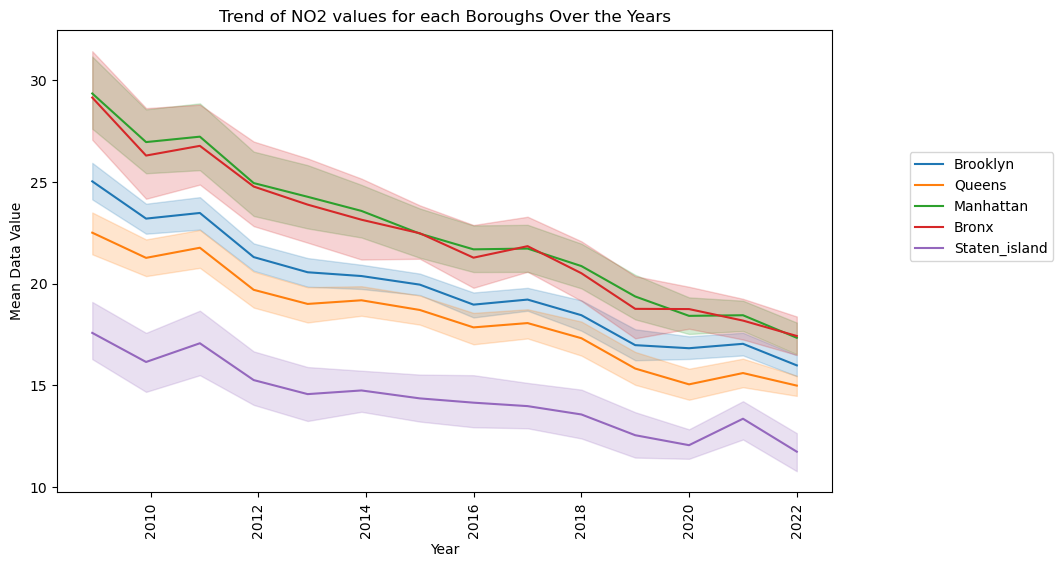

In [27]:
# visualize the trend of NO2 values for each Boroughs
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Borough_name', data=NO2)
plt.title('Trend of NO2 values for each Boroughs Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Data Value')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [28]:
NO2.groupby(['Borough_name', 'Start_year'])['Data Value'].mean().sort_values()

Borough_name   Start_year
Staten_island  2022          11.740000
               2020          12.060000
               2019          12.550000
               2021          13.360000
               2018          13.570000
                               ...    
Bronx          2010          26.773077
Manhattan      2009          26.958333
               2010          27.225000
Bronx          2008          29.146154
Manhattan      2008          29.347222
Name: Data Value, Length: 65, dtype: float64

<b>Insight:
* though there seem to be a little spike in 2021 and 2011 but overall <br/> there is a steady decline in the levels of Nitrogen Dioxide(NO2) across boroughs.
* the average levels of NO2 remained lowest in Staten_island and highest in Bronx and Manhattan.

<br/>

### Fine particles (PM 2.5)

In [29]:
# extract records for PM 2.5
Fine_part = annual_avg_pol[annual_avg_pol['Name']=='Fine particles (PM 2.5)']
Fine_part.head()


,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
2,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,2011-12-01,8.6,2011,Brooklyn
3,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,2011-12-01,8.0,2011,Queens
10,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2013,2012-12-01,8.2,2012,Brooklyn
11,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,210.0,Coney Island - Sheepshead Bay,Annual Average 2013,2012-12-01,8.1,2012,Brooklyn
12,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2017,2017-01-01,6.8,2017,Queens


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


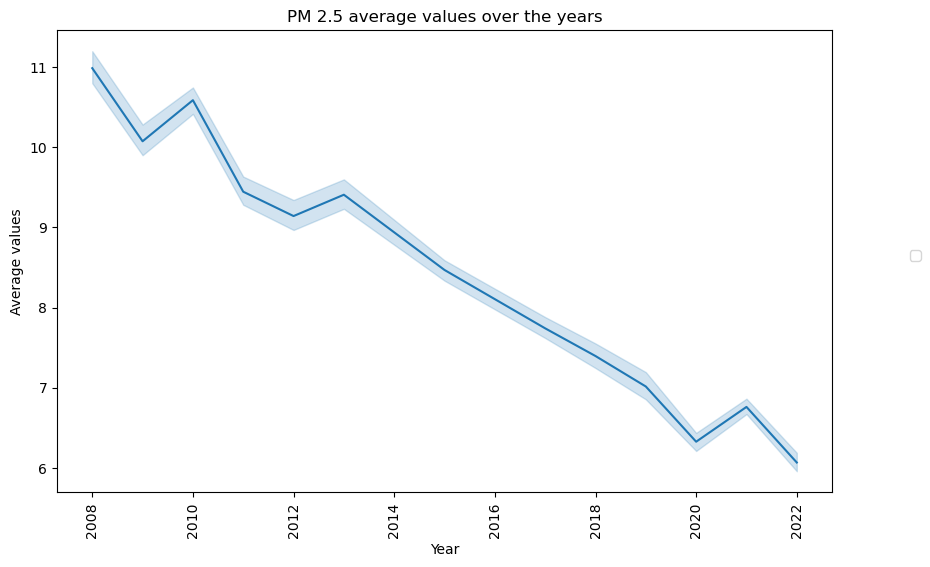

In [30]:
# plot trend of PM 2.5 over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_year', y='Data Value', data=Fine_part)
plt.title('PM 2.5 average values over the years')
plt.xlabel('Year')
plt.ylabel('Average values')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [31]:
Fine_part.groupby(['Name', 'Start_year'])['Data Value'].mean().sort_values()

Name                     Start_year
Fine particles (PM 2.5)  2022           6.067376
                         2020           6.326950
                         2021           6.760993
                         2019           7.015603
                         2018           7.395745
                         2017           7.741135
                         2015           8.469149
                         2012           9.141844
                         2013           9.407801
                         2011           9.445390
                         2009          10.074468
                         2010          10.587234
                         2008          10.986525
Name: Data Value, dtype: float64

<b>Insight:
* There is a steady decline in annual average levels(values) of PM 2.5 in New York<br/> from 10.99mcg/m3 in 2008 to 6.07mcg/m3 in 2022

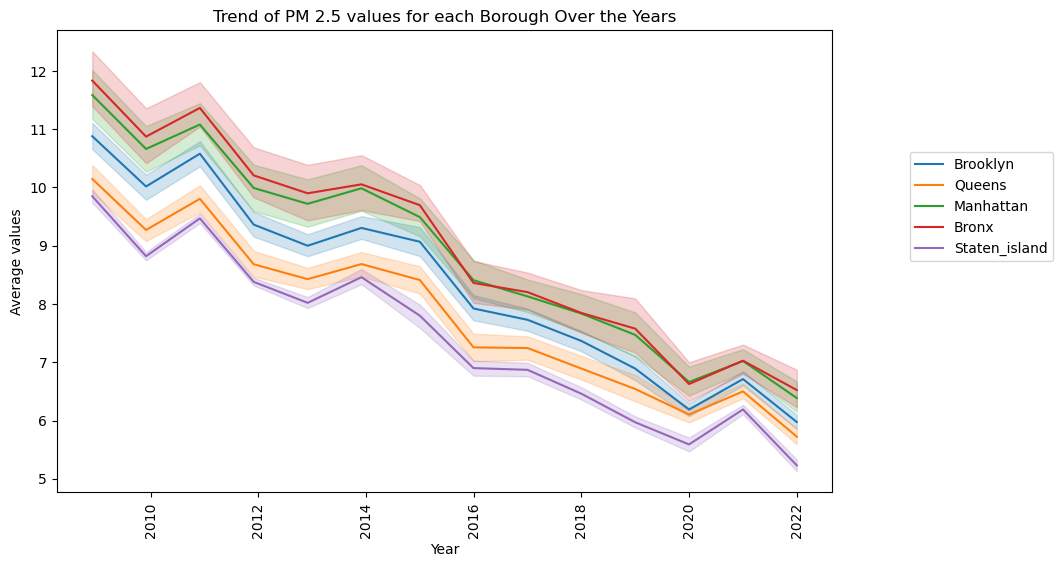

In [32]:
# visualize the trend of PM 2.5 values for each Borough
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Borough_name', data=Fine_part)
plt.title('Trend of PM 2.5 values for each Borough Over the Years')
plt.xlabel('Year')
plt.ylabel('Average values')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [33]:
Fine_part.groupby(['Borough_name', 'Start_year'])['Data Value'].mean().sort_values()

Borough_name   Start_year
Staten_island  2022           5.230000
               2020           5.590000
Queens         2022           5.723529
Staten_island  2019           5.970000
Brooklyn       2022           5.974286
                               ...    
               2008          10.880000
Manhattan      2010          11.080556
Bronx          2010          11.365385
Manhattan      2008          11.586111
Bronx          2008          11.834615
Name: Data Value, Length: 65, dtype: float64

<b>Insight:
* there is a an observable steady decline in the levels of PM 2.5 in all the boroughs.
* the average levels of PM 2.5 remained lowest in Staten_island and highest in Bronx followed by Manhattan.

<br/>

### Ozone (O3)

In [34]:
Ozone = seasons[seasons['Name']=='Ozone (O3)']
Ozone.head()


,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
723,386,Ozone (O3),Mean,ppb,UHF42,308.0,Greenwich Village - SoHo,Summer 2016,2016-06-01,30.0,2016,Manhattan
724,386,Ozone (O3),Mean,ppb,Borough,2.0,Brooklyn,Summer 2016,2016-06-01,34.0,2016,Brooklyn
725,386,Ozone (O3),Mean,ppb,UHF42,207.0,East Flatbush - Flatbush,Summer 2011,2011-06-01,32.7,2011,Brooklyn
726,386,Ozone (O3),Mean,ppb,UHF42,208.0,Canarsie - Flatlands,Summer 2016,2016-06-01,35.8,2016,Brooklyn
727,386,Ozone (O3),Mean,ppb,UHF42,107.0,Hunts Point - Mott Haven,Summer 2011,2011-06-01,33.4,2011,Bronx


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


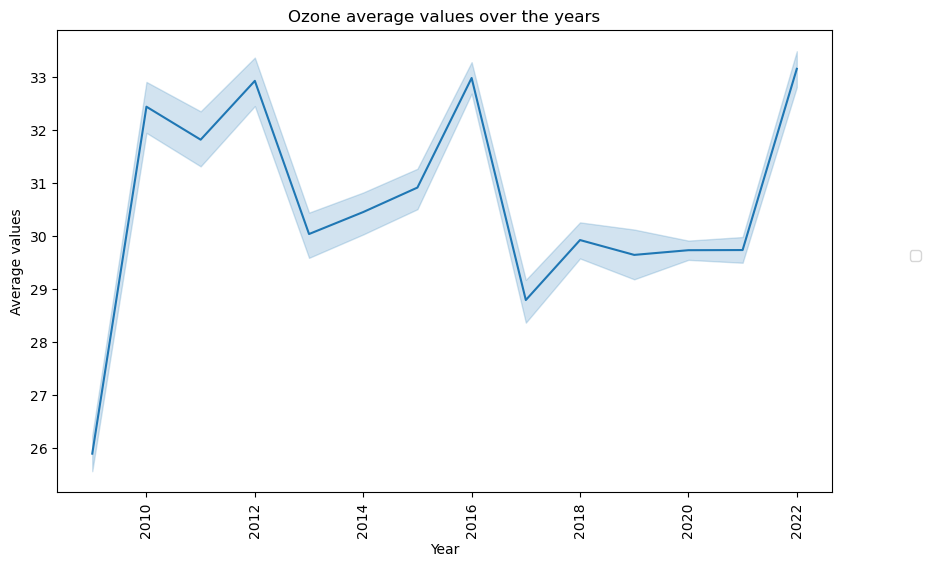

In [35]:
# plot trend of Ozone over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_year', y='Data Value', data=Ozone)
plt.title('Ozone average values over the years')
plt.xlabel('Year')
plt.ylabel('Average values')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [36]:
Ozone.groupby(['Name', 'Start_year'])['Data Value'].mean().sort_values()

Name        Start_year
Ozone (O3)  2009          25.895390
            2017          28.793617
            2019          29.645390
            2020          29.734043
            2021          29.736879
            2018          29.925532
            2013          30.039007
            2014          30.453901
            2015          30.915603
            2011          31.819149
            2010          32.441135
            2012          32.929078
            2016          32.982979
            2022          33.156028
Name: Data Value, dtype: float64

<b>Insight:
* The seasonal average values of Ozone have been fluctuating in between 25ppb and 34ppb from 2009 to 2022<br/> with its highest level being 33.16ppb in 2022

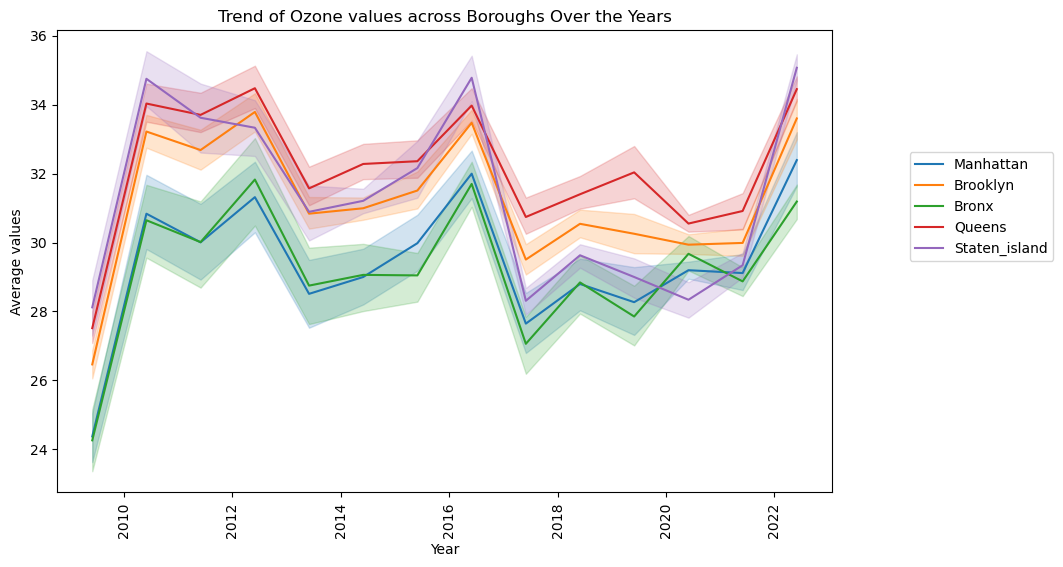

In [37]:
# visualize the trend of Ozone values across Boroughs
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Borough_name', data=Ozone)
plt.title('Trend of Ozone values across Boroughs Over the Years')
plt.xlabel('Year')
plt.ylabel('Average values')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [38]:
Ozone.groupby(['Borough_name', 'Start_year'])['Data Value'].mean().sort_values()

Borough_name   Start_year
Bronx          2009          24.261538
Manhattan      2009          24.373611
Brooklyn       2009          26.464286
Bronx          2017          27.061538
Queens         2009          27.516176
                               ...    
               2022          34.450000
               2012          34.476471
Staten_island  2010          34.750000
               2016          34.780000
               2022          35.070000
Name: Data Value, Length: 70, dtype: float64

<b>Insight:
* there is no observable steady decline or increase in the levels of Ozone across boroughs.<br/> 
* 2022 recorded the highest average values for all the boroughs with Steten_island being the highest

<br/>

## Health Impacts

### Health impacts across time and boroughs

In [39]:
#extract records of impact 
impacts = ['Asthma emergency department visits due to PM2.5',
'Asthma hospitalizations due to Ozone',
'Respiratory hospitalizations due to PM2.5 (age 20+)',
'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
'Cardiac and respiratory deaths due to Ozone',
'Asthma emergency departments visits due to Ozone',
'Deaths due to PM2.5']

annual_avg_impact = annual_avg[annual_avg['Name'].isin(impacts)]
annual_avg_impact.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
187,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,208.0,Canarsie - Flatlands,2009-2011,2009-01-01,81.7,2009,Brooklyn
188,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407.0,Southwest Queens,2009-2011,2009-01-01,80.0,2009,Queens
189,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,207.0,East Flatbush - Flatbush,2009-2011,2009-01-01,115.8,2009,Brooklyn
190,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,408.0,Jamaica,2015-2017,2015-01-01,69.6,2015,Queens
191,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407.0,Southwest Queens,2015-2017,2015-01-01,43.0,2015,Queens


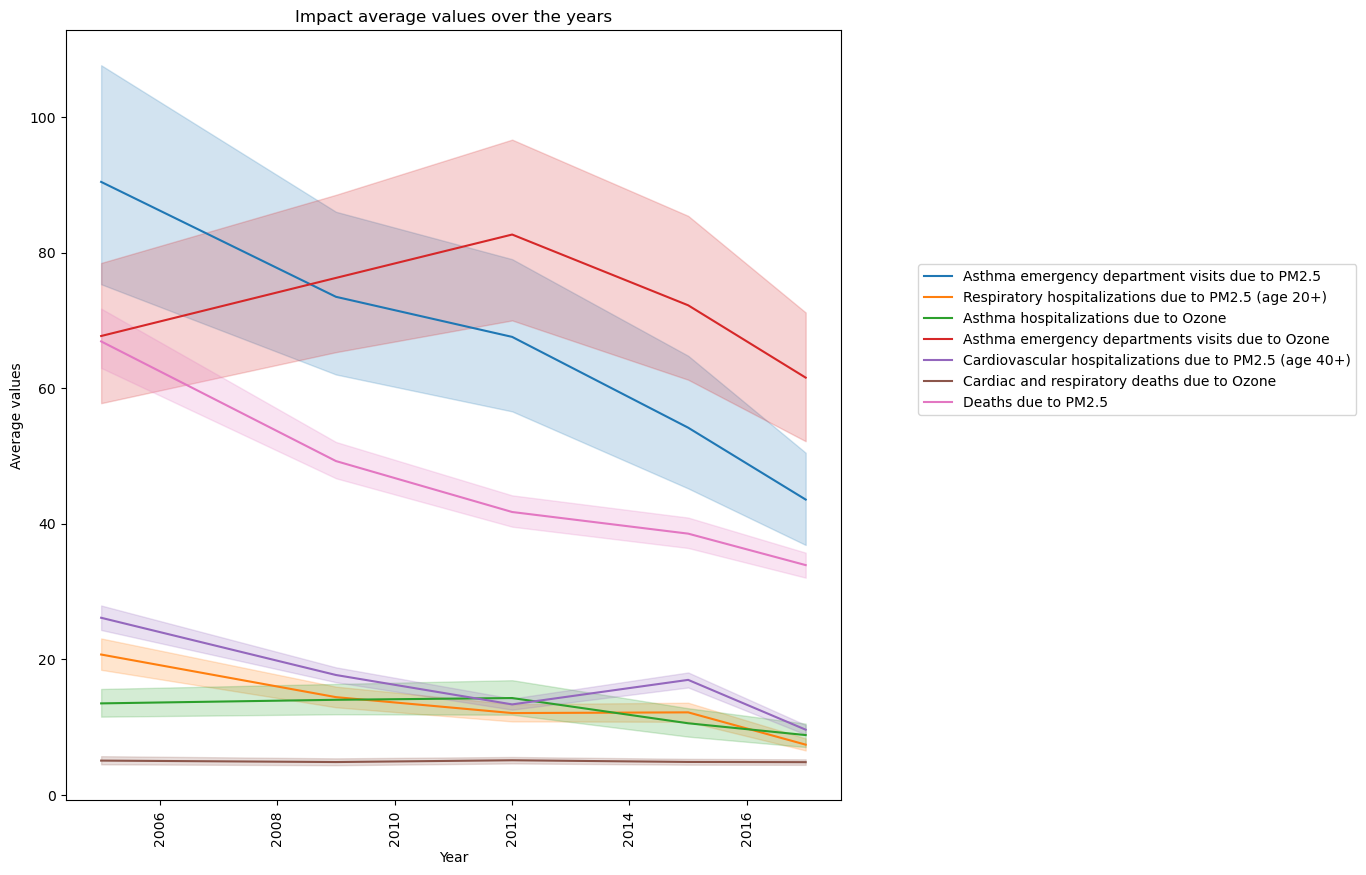

In [40]:
# visualize the trend of the impacts
plt.figure(figsize=(10, 10))
sns.lineplot(x='Start_Date', y='Data Value', hue='Name', data=annual_avg_impact)
plt.title('Impact average values over the years')
plt.xlabel('Year')
plt.ylabel('Average values')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [41]:
#get total impacts per time period
impact_time = annual_avg_impact.groupby(['Name', 'Time Period'])['Data Value'].sum().reset_index()
impact_time

,Name,Time Period,Data Value
0,Asthma emergency department visits due to PM2.5,2005-2007,8681.5
1,Asthma emergency department visits due to PM2.5,2009-2011,7054.3
2,Asthma emergency department visits due to PM2.5,2012-2014,6486.9
3,Asthma emergency department visits due to PM2.5,2015-2017,5201.5
4,Asthma emergency department visits due to PM2.5,2017-2019,4184.0
5,Asthma emergency departments visits due to Ozone,2005-2007,6499.4
6,Asthma emergency departments visits due to Ozone,2009-2011,7322.1
7,Asthma emergency departments visits due to Ozone,2012-2014,7936.0
8,Asthma emergency departments visits due to Ozone,2015-2017,6934.3
9,Asthma emergency departments visits due to Ozone,2017-2019,6218.0


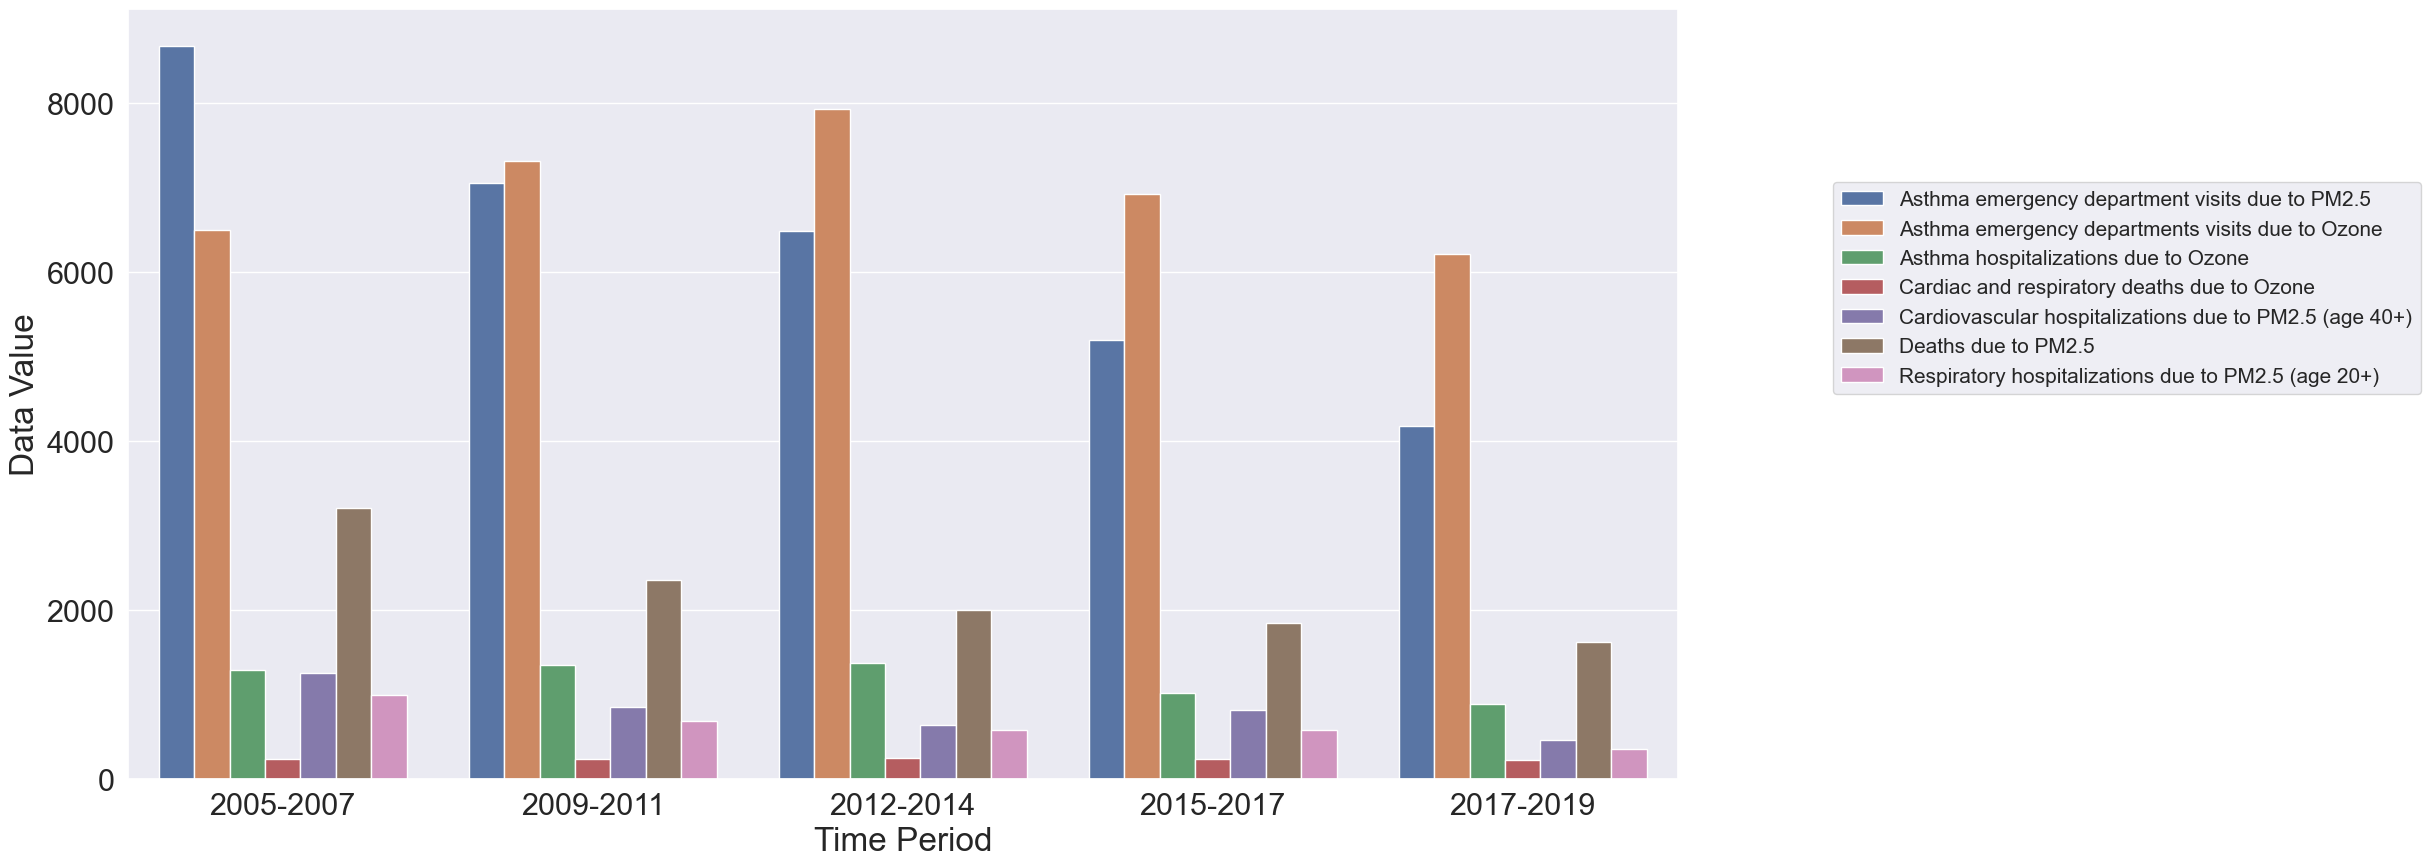

In [42]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x='Time Period', y='Data Value', hue = "Name", data=impact_time)
plt.xticks(rotation=0)
plt.legend(loc=(1.1,0.5), fontsize=15)
plt.show;

<b>Insight
* Asthma emergency department visits due to PM2.5 saw a steady decline from 2005 (8681.5 visits) to 2017 (4184.0 visits). Within same period Asthma emergency departments visits due to Ozone overtook that of PM2.5 around 2009, peaked around 2012-2014 (7936.0 visits) and remained higher than that of PM2.5
* Deaths due to PM2.5 also recorded a steady decline within same period, from 3211.6 deaths in 2005 to 1628 deaths in 2017 while number of Cardiac and respiratory deaths due to Ozone remained relatively stable between 233 to 246 deaths.
* Though the number of Cardiovascular hospitalizations due to PM2.5 for people above 40years remained higher than that of people between 20 and 40 years, their numbers actually declined and increased at same times while that of Asthma hospitalizations due to Ozone takes an opposite pattern. 


In [43]:
# get total values for each impact over the years
total_impact = annual_avg_impact.groupby('Name')['Data Value'].sum().sort_values().reset_index()
total_impact

,Name,Data Value
0,Cardiac and respiratory deaths due to Ozone,1192.1
1,Respiratory hospitalizations due to PM2.5 (age...,3211.5
2,Cardiovascular hospitalizations due to PM2.5 (...,4025.6
3,Asthma hospitalizations due to Ozone,5922.9
4,Deaths due to PM2.5,11058.6
5,Asthma emergency department visits due to PM2.5,31608.2
6,Asthma emergency departments visits due to Ozone,34909.8


In [44]:
a = total_impact['Data Value'].sum().round()

In [45]:
print(f'The total number of casualties on the average between 2005 and 2017 is {a}')

The total number of casualties on the average between 2005 and 2017 is 91929.0


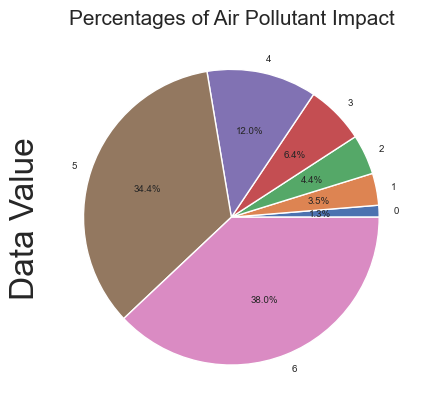

In [46]:
# create pie chart showing the proportions of the impacts

total_impact['Data Value'].plot(kind='pie', autopct='%1.1f%%', startangle=360, fontsize=7)
plt.title('Percentages of Air Pollutant Impact', fontsize=15)
plt.show()

<br/>

### Asthma emergency department visits due to PM2.5

In [47]:
# extract records for Asthma emergency department visits due to PM2.5
Asthma_emer_fine = annual_avg_impact[annual_avg_impact['Name']=='Asthma emergency department visits due to PM2.5']
Asthma_emer_fine.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
187,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,208.0,Canarsie - Flatlands,2009-2011,2009-01-01,81.7,2009,Brooklyn
188,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407.0,Southwest Queens,2009-2011,2009-01-01,80.0,2009,Queens
189,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,207.0,East Flatbush - Flatbush,2009-2011,2009-01-01,115.8,2009,Brooklyn
190,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,408.0,Jamaica,2015-2017,2015-01-01,69.6,2015,Queens
191,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407.0,Southwest Queens,2015-2017,2015-01-01,43.0,2015,Queens


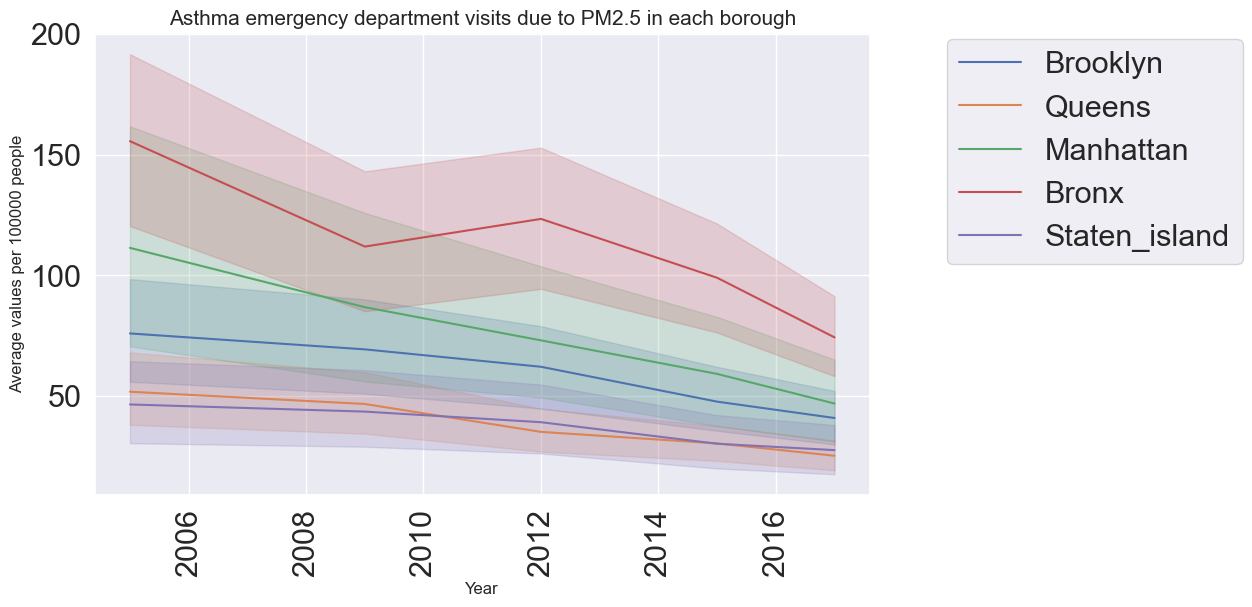

In [48]:
#visualize the trend of Asthma emergency department visits due to PM2.5 in each borough
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Borough_name', data=Asthma_emer_fine)
plt.title('Asthma emergency department visits due to PM2.5 in each borough', fontsize=15)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average values per 100000 people', fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [49]:
# get the total number of Asthma emergency department visits due to PM2.5 in each borough per Time period
emer = Asthma_emer_fine.groupby(['Name', 'Borough_name','Time Period'])['Data Value'].sum().reset_index()
emer

,Name,Borough_name,Time Period,Data Value
0,Asthma emergency department visits due to PM2.5,Bronx,2005-2007,2801.8
1,Asthma emergency department visits due to PM2.5,Bronx,2009-2011,2015.4
2,Asthma emergency department visits due to PM2.5,Bronx,2012-2014,2221.9
3,Asthma emergency department visits due to PM2.5,Bronx,2015-2017,1783.1
4,Asthma emergency department visits due to PM2.5,Bronx,2017-2019,1338.0
5,Asthma emergency department visits due to PM2.5,Brooklyn,2005-2007,1823.2
6,Asthma emergency department visits due to PM2.5,Brooklyn,2009-2011,1664.8
7,Asthma emergency department visits due to PM2.5,Brooklyn,2012-2014,1491.6
8,Asthma emergency department visits due to PM2.5,Brooklyn,2015-2017,1144.8
9,Asthma emergency department visits due to PM2.5,Brooklyn,2017-2019,982.0


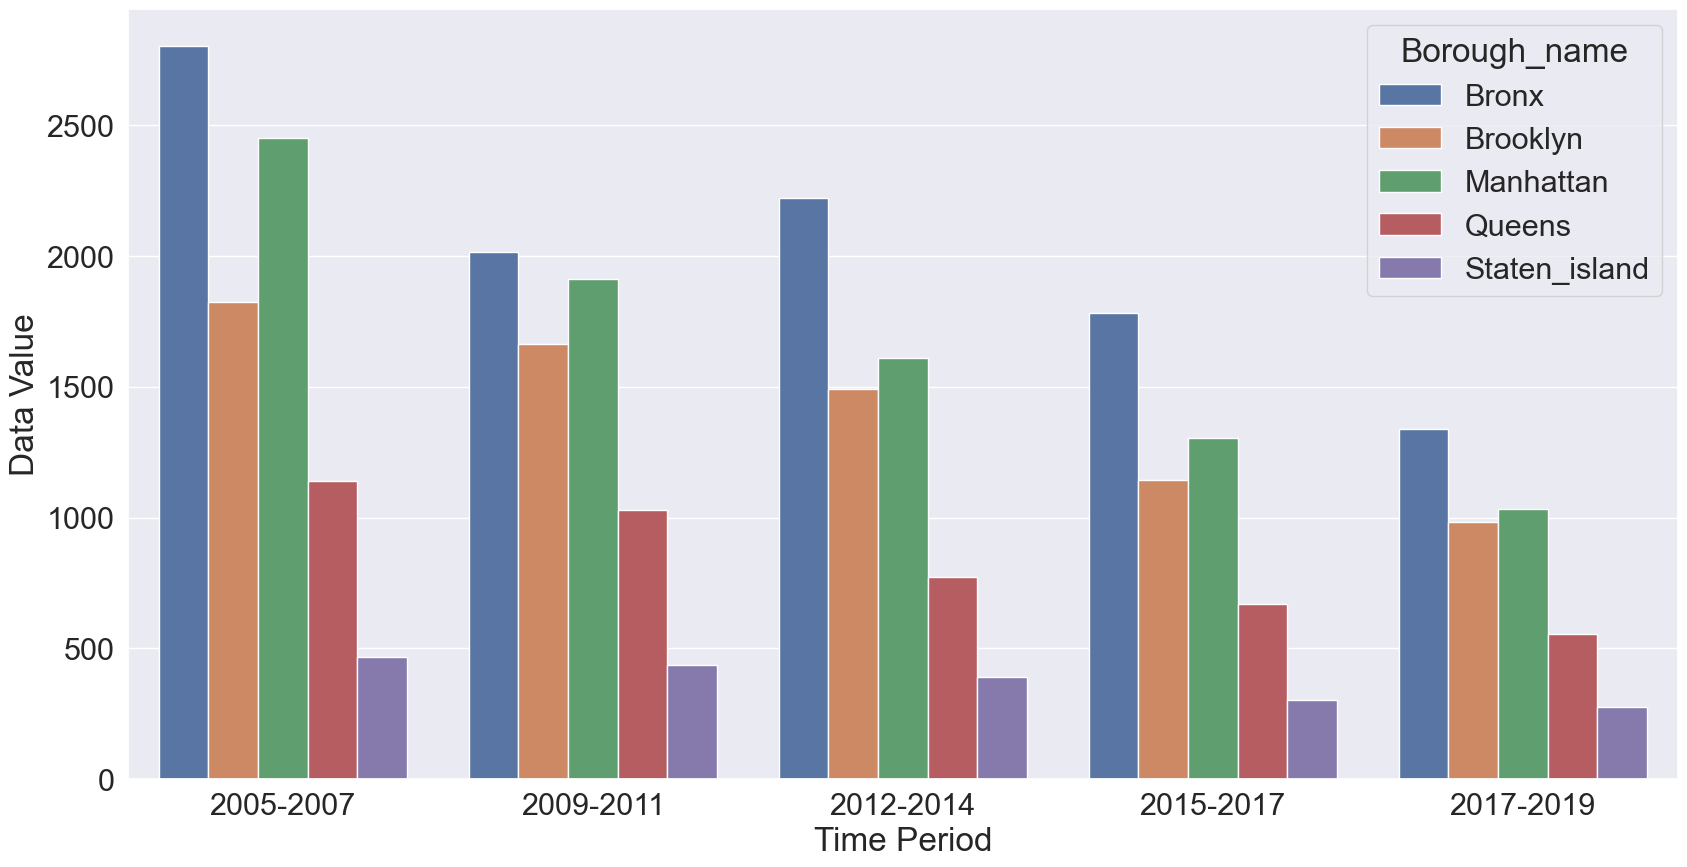

In [50]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x='Time Period', y='Data Value', hue = "Borough_name",  data=emer)
plt.xticks(rotation=0)
plt.show;

In [51]:
# get the total number of Asthma emergency department visits due to PM2.5 in each borough over the years
emery = Asthma_emer_fine.groupby(['Name', 'Borough_name'])['Data Value'].sum().sort_values(ascending=False).reset_index()
emery

,Name,Borough_name,Data Value
0,Asthma emergency department visits due to PM2.5,Bronx,10160.2
1,Asthma emergency department visits due to PM2.5,Manhattan,8304.5
2,Asthma emergency department visits due to PM2.5,Brooklyn,7106.4
3,Asthma emergency department visits due to PM2.5,Queens,4165.9
4,Asthma emergency department visits due to PM2.5,Staten_island,1871.2


<b>Insight:
* Though the numbers of Asthma emergency department visits due to PM2.5 within the period vary across the five boroughs with Bronx maintaining highest numbers while Steten_island recorded the lowest values, there was a steady declined in all boroughs from 2005 to 2017. 

<br/>

### Asthma emergency departments visits due to Ozone 

In [52]:
# extract records of Asthma emergency departments visits due to Ozone  
Asthma_emer_ozone = annual_avg_impact[annual_avg_impact['Name']=='Asthma emergency departments visits due to Ozone']
Asthma_emer_ozone.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
6213,659,Asthma emergency departments visits due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,302.0,Central Harlem - Morningside Heights,2015-2017,2015-01-01,121.4,2015,Manhattan
6373,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,309.0,Union Square - Lower East Side,2015-2017,2015-01-01,124.9,2015,Manhattan
6388,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,409.0,Southeast Queens,2012-2014,2012-01-02,83.8,2012,Queens
6390,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,409.0,Southeast Queens,2015-2017,2015-01-01,60.1,2015,Queens
6392,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",UHF42,209.0,Bensonhurst - Bay Ridge,2015-2017,2015-01-01,25.9,2015,Brooklyn


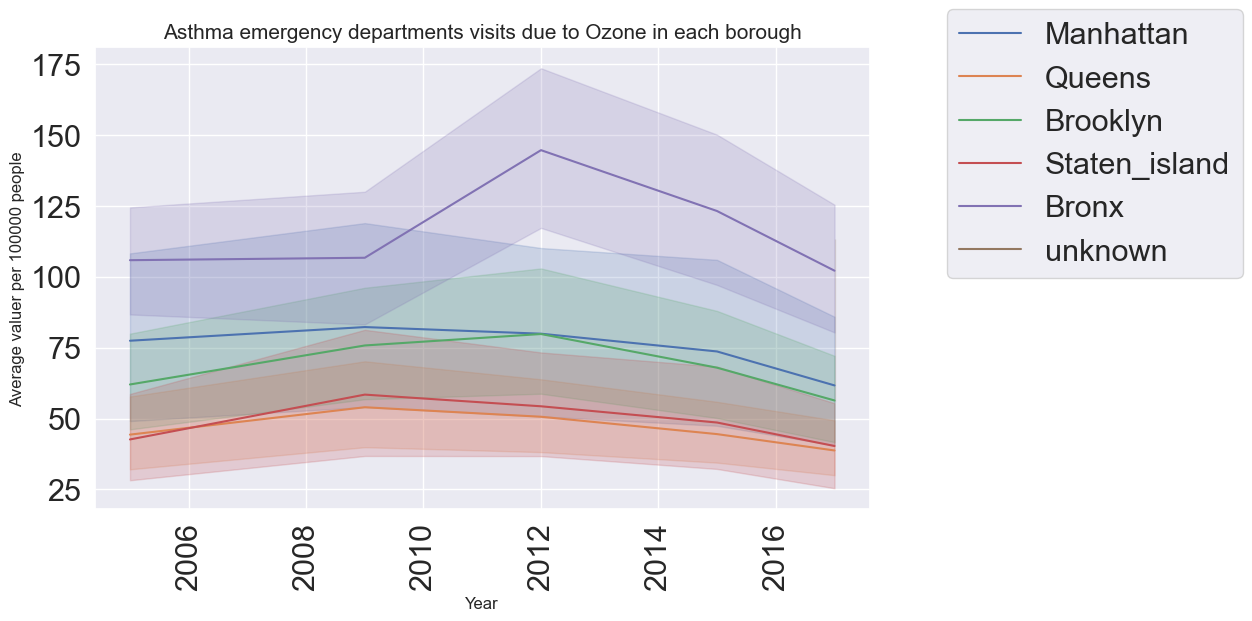

In [53]:
# visualize the trend of Asthma emergency departments visits due to Ozone in each borough 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Borough_name', data=Asthma_emer_ozone)
plt.title('Asthma emergency departments visits due to Ozone in each borough', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average valuer per 100000 people', fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

<br/>

In [54]:
# get the total number of Asthma emergency departments visits due to Ozone in each borough per Time period
emero = Asthma_emer_ozone.groupby(['Name', 'Borough_name','Time Period'])['Data Value'].sum().sort_values(ascending=False).reset_index()
emero

,Name,Borough_name,Time Period,Data Value
0,Asthma emergency departments visits due to Ozone,Bronx,2012-2014,2604.7
1,Asthma emergency departments visits due to Ozone,Bronx,2015-2017,2218.1
2,Asthma emergency departments visits due to Ozone,Bronx,2009-2011,1921.2
3,Asthma emergency departments visits due to Ozone,Brooklyn,2012-2014,1915.7
4,Asthma emergency departments visits due to Ozone,Bronx,2005-2007,1905.8
5,Asthma emergency departments visits due to Ozone,Bronx,2017-2019,1839.0
6,Asthma emergency departments visits due to Ozone,Brooklyn,2009-2011,1818.8
7,Asthma emergency departments visits due to Ozone,Manhattan,2009-2011,1810.1
8,Asthma emergency departments visits due to Ozone,Manhattan,2012-2014,1758.6
9,Asthma emergency departments visits due to Ozone,Manhattan,2005-2007,1704.0


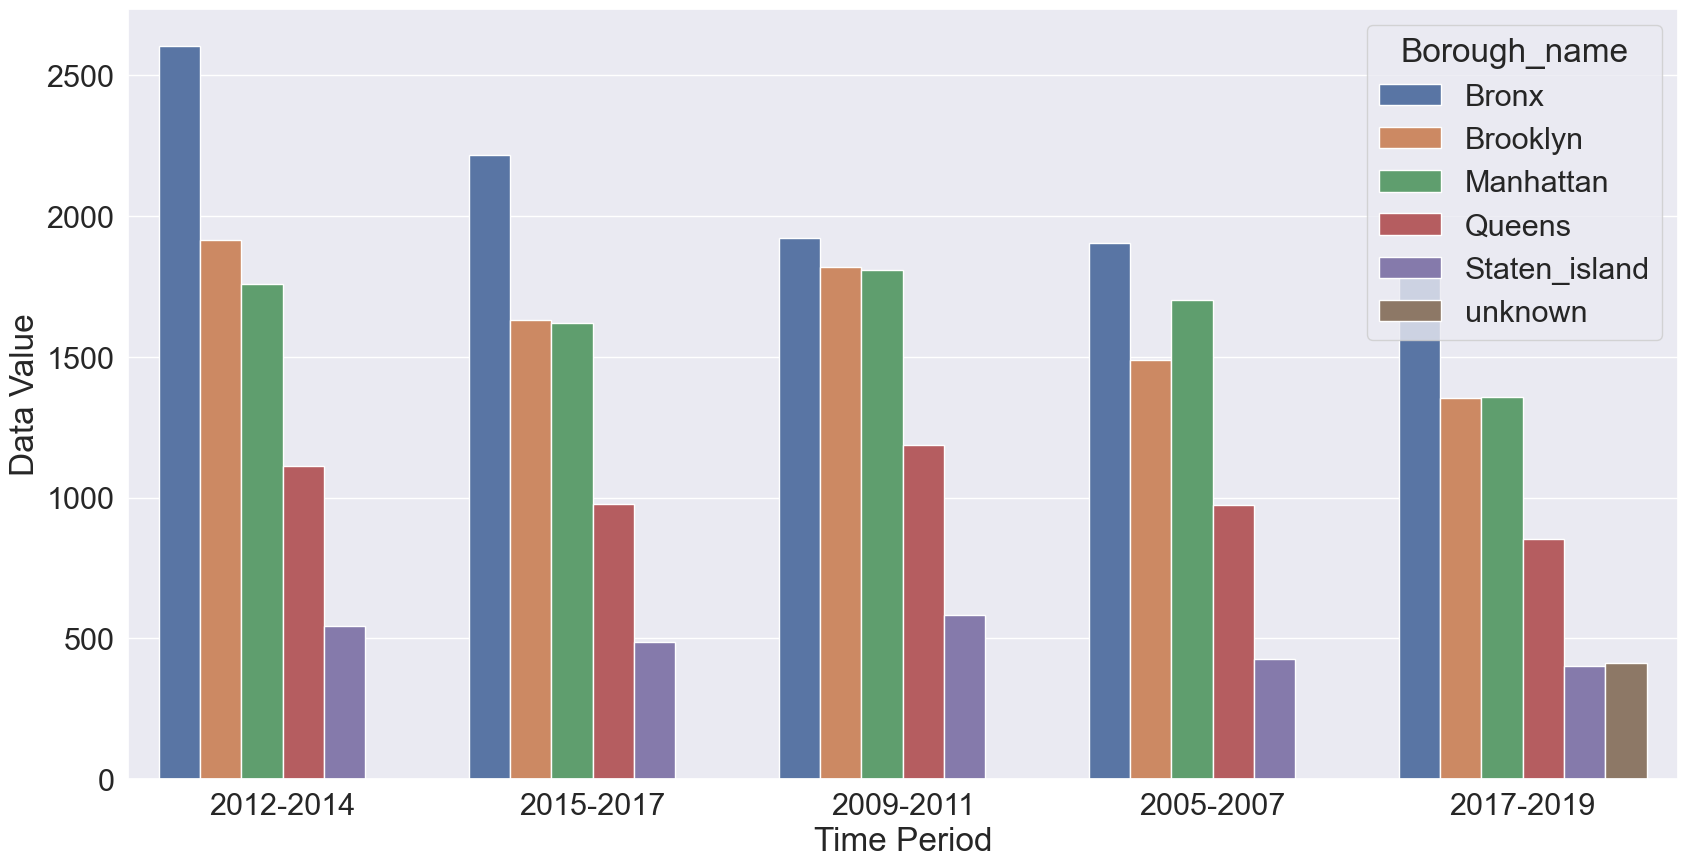

In [55]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x='Time Period', y='Data Value',hue = "Borough_name",  data=emero)
plt.xticks(rotation=0)
plt.show;

In [56]:
# get the total number of Asthma emergency departments visits due to Ozone in each borough over the years
emeroy = Asthma_emer_ozone.groupby(['Name', 'Borough_name'])['Data Value'].sum().sort_values(ascending=False).reset_index()
emeroy

,Name,Borough_name,Data Value
0,Asthma emergency departments visits due to Ozone,Bronx,10488.8
1,Asthma emergency departments visits due to Ozone,Manhattan,8250.4
2,Asthma emergency departments visits due to Ozone,Brooklyn,8206.5
3,Asthma emergency departments visits due to Ozone,Queens,5107.4
4,Asthma emergency departments visits due to Ozone,Staten_island,2442.7
5,Asthma emergency departments visits due to Ozone,unknown,414.0


<b> Insight <b/>
* Asthma emergency departments visits due to Ozone remained heighest in Bronx while Staten_Island remained lowest.
* In Bronx the average yearly visits increased rapidly in 2009 and peaked in 2012, and started coming down to its 2005 values 

<br/>

### Asthma hospitalizations due to Ozone 

In [57]:
# extract records of Asthma hospitalizations due to Ozone
Asthma_hos_ozone = annual_avg_impact[annual_avg_impact['Name']=='Asthma hospitalizations due to Ozone']
Asthma_hos_ozone.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
1120,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,402.0,West Queens,2017-2019,2017-01-01,2.0,2017,Queens
1253,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",Borough,4.0,Queens,2017-2019,2017-01-01,2.0,2017,Queens
1635,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,202.0,Downtown - Heights - Slope,2005-2007,2005-01-01,7.9,2005,Brooklyn
1636,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,302.0,Central Harlem - Morningside Heights,2005-2007,2005-01-01,13.1,2005,Manhattan
1637,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,102.0,Northeast Bronx,2005-2007,2005-01-01,9.0,2005,Bronx


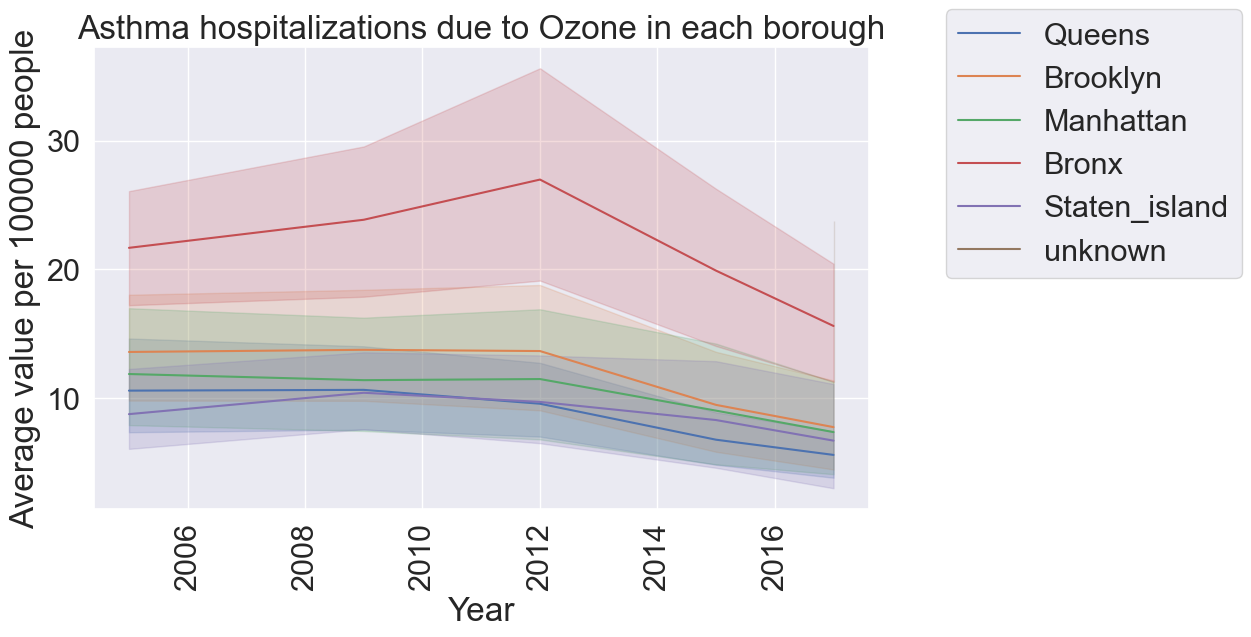

In [58]:
# visualize the trend of Asthma hospitalizations due to Ozone in each borough
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Borough_name', data=Asthma_hos_ozone)
plt.title('Asthma hospitalizations due to Ozone in each borough')
plt.xlabel('Year')
plt.ylabel('Average value per 100000 people')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [59]:
# get the total number of Asthma hospitalizations due to Ozone in each borough per Time period
ast = Asthma_hos_ozone.groupby(['Name', 'Borough_name','Time Period'])['Data Value'].sum().reset_index()
ast

,Name,Borough_name,Time Period,Data Value
0,Asthma hospitalizations due to Ozone,Bronx,2005-2007,390.3
1,Asthma hospitalizations due to Ozone,Bronx,2009-2011,429.6
2,Asthma hospitalizations due to Ozone,Bronx,2012-2014,485.8
3,Asthma hospitalizations due to Ozone,Bronx,2015-2017,358.4
4,Asthma hospitalizations due to Ozone,Bronx,2017-2019,281.0
5,Asthma hospitalizations due to Ozone,Brooklyn,2005-2007,326.2
6,Asthma hospitalizations due to Ozone,Brooklyn,2009-2011,330.2
7,Asthma hospitalizations due to Ozone,Brooklyn,2012-2014,327.9
8,Asthma hospitalizations due to Ozone,Brooklyn,2015-2017,227.5
9,Asthma hospitalizations due to Ozone,Brooklyn,2017-2019,186.0


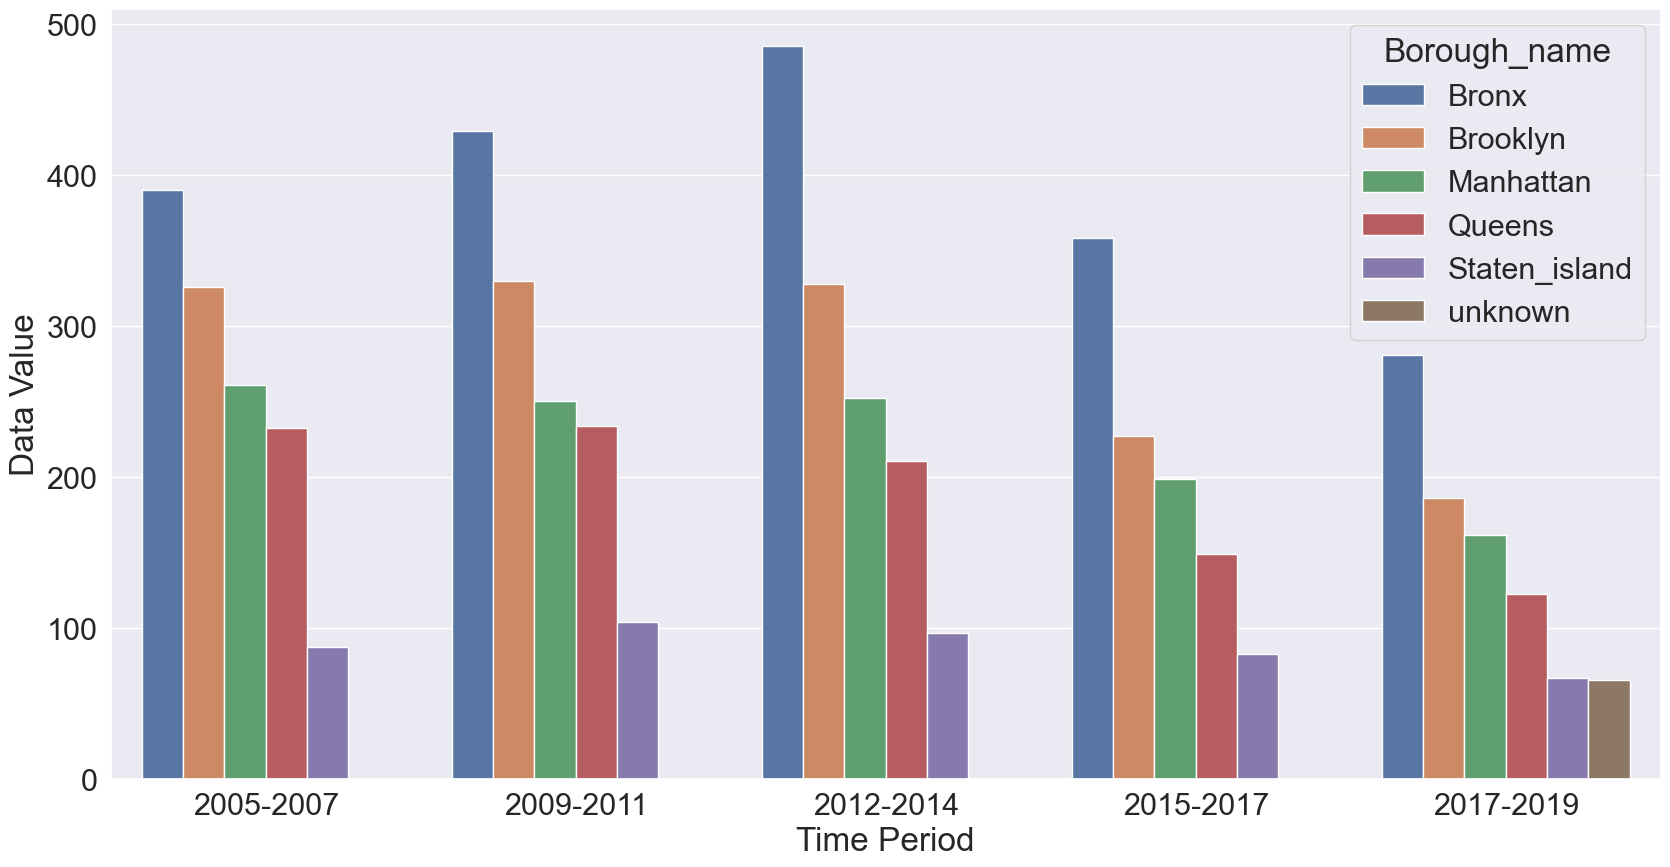

In [60]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x='Time Period', y='Data Value',hue = "Borough_name",  data=ast)
plt.xticks(rotation=0)
plt.show;

In [61]:
# get the total number of Asthma emergency departments visits due to Ozone in each borough over the years
asty = Asthma_hos_ozone.groupby(['Name', 'Borough_name'])['Data Value'].sum().sort_values(ascending=False).reset_index()
asty

,Name,Borough_name,Data Value
0,Asthma hospitalizations due to Ozone,Bronx,1945.1
1,Asthma hospitalizations due to Ozone,Brooklyn,1397.8
2,Asthma hospitalizations due to Ozone,Manhattan,1125.5
3,Asthma hospitalizations due to Ozone,Queens,949.6
4,Asthma hospitalizations due to Ozone,Staten_island,438.9
5,Asthma hospitalizations due to Ozone,unknown,66.0


<b>Insight
* While Bronx remained highest and Staten_Island lowest, Asthma hospitalizations due to Ozone for all boroughs has been on decline since 2012

<br/>

### Cardiac and respiratory deaths due to Ozone

In [62]:
#extract records of Cardiac and respiratory deaths due to Ozone
cardiac_death_ozone = annual_avg_impact[annual_avg_impact['Name']=='Cardiac and respiratory deaths due to Ozone']
cardiac_death_ozone.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
7660,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,310.0,Lower Manhattan,2005-2007,2005-01-01,3.8,2005,Manhattan
7679,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,302.0,Central Harlem - Morningside Heights,2005-2007,2005-01-01,5.0,2005,Manhattan
7680,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,202.0,Downtown - Heights - Slope,2005-2007,2005-01-01,4.9,2005,Brooklyn
7681,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,302.0,Central Harlem - Morningside Heights,2017-2019,2017-01-01,4.0,2017,Manhattan
7682,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,302.0,Central Harlem - Morningside Heights,2015-2017,2015-01-01,4.4,2015,Manhattan


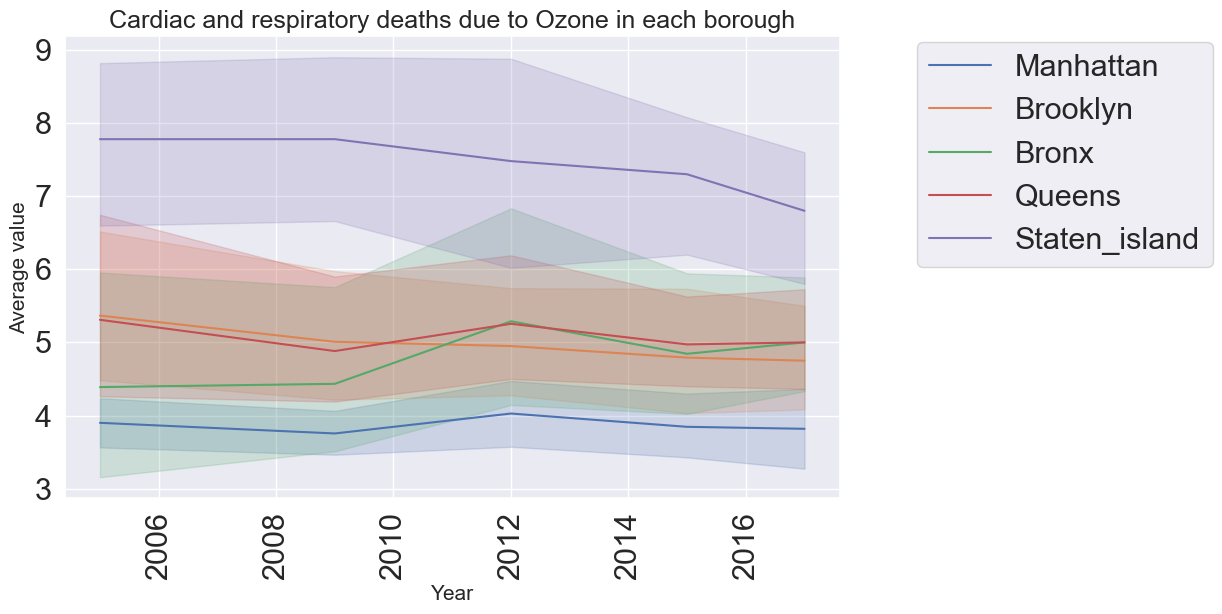

In [63]:
# visualize the trend of  Cardiac and respiratory deaths due to Ozone in each borough
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Borough_name', data=cardiac_death_ozone)
plt.title('Cardiac and respiratory deaths due to Ozone in each borough', fontsize=18)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average value', fontsize=15)
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [64]:
#get the total number of Cardiac and respiratory deaths due to Ozone in each borough per Time period
card_o = cardiac_death_ozone.groupby(['Name', 'Borough_name','Time Period'])['Data Value'].sum().reset_index()
card_o

,Name,Borough_name,Time Period,Data Value
0,Cardiac and respiratory deaths due to Ozone,Bronx,2005-2007,39.5
1,Cardiac and respiratory deaths due to Ozone,Bronx,2009-2011,39.9
2,Cardiac and respiratory deaths due to Ozone,Bronx,2012-2014,47.6
3,Cardiac and respiratory deaths due to Ozone,Bronx,2015-2017,43.6
4,Cardiac and respiratory deaths due to Ozone,Bronx,2017-2019,45.0
5,Cardiac and respiratory deaths due to Ozone,Brooklyn,2005-2007,64.4
6,Cardiac and respiratory deaths due to Ozone,Brooklyn,2009-2011,60.1
7,Cardiac and respiratory deaths due to Ozone,Brooklyn,2012-2014,59.4
8,Cardiac and respiratory deaths due to Ozone,Brooklyn,2015-2017,57.5
9,Cardiac and respiratory deaths due to Ozone,Brooklyn,2017-2019,57.0


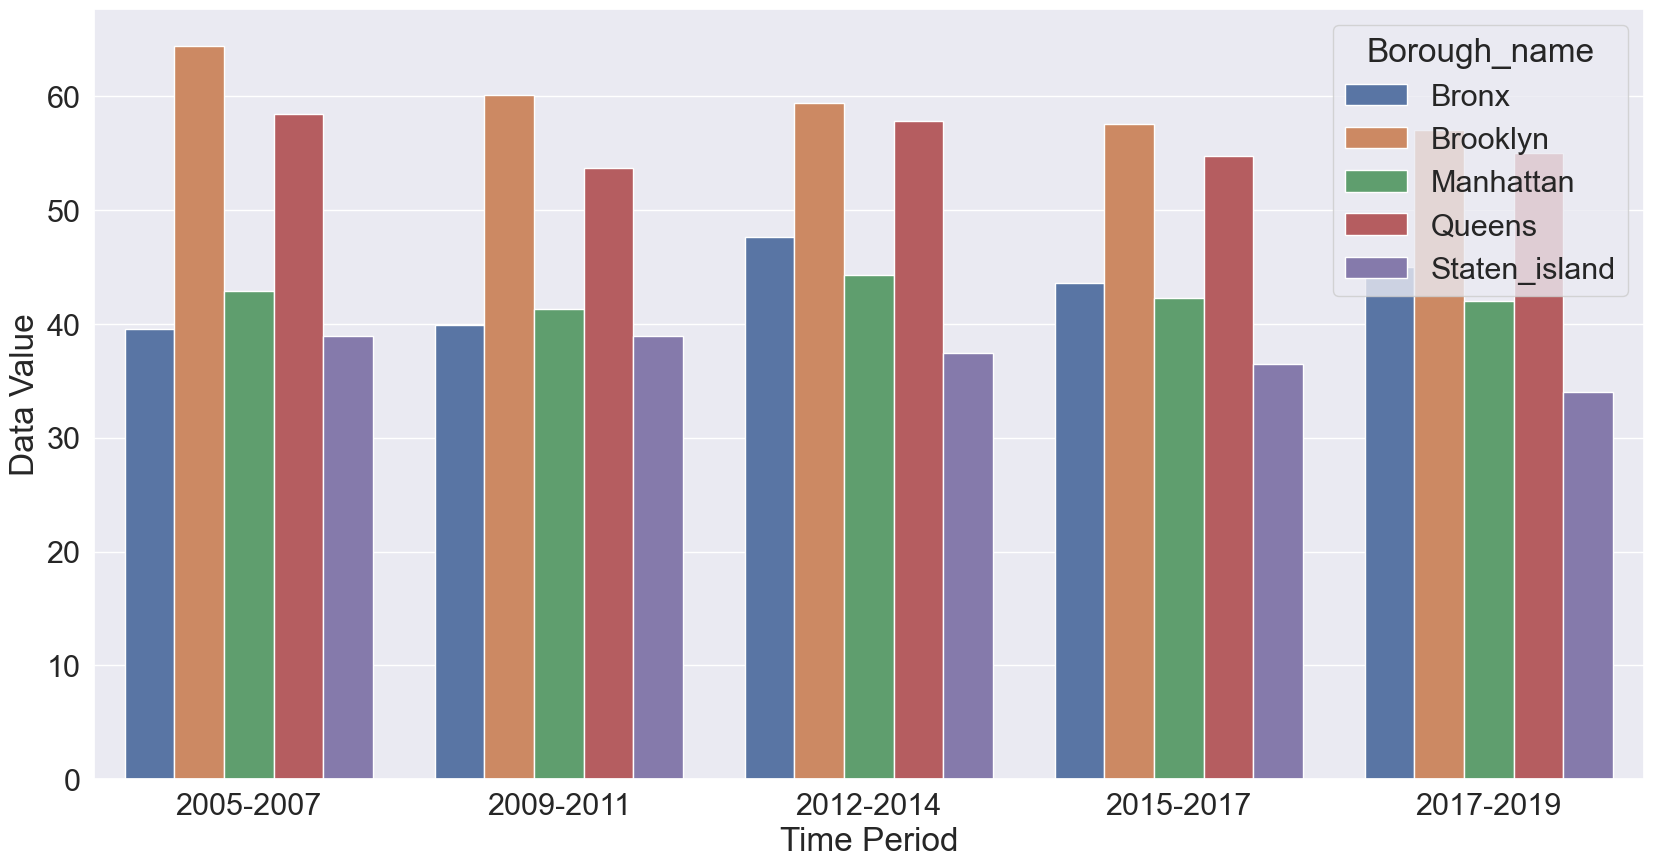

In [65]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x='Time Period', y='Data Value',hue = "Borough_name",  data=card_o)
plt.xticks(rotation=0)
plt.show;

In [66]:
# get the total number of Cardiac and respiratory deaths due to Ozone in each borough over the years
card_oy = cardiac_death_ozone.groupby(['Name', 'Borough_name'])['Data Value'].sum().sort_values(ascending=False).reset_index()
card_oy

,Name,Borough_name,Data Value
0,Cardiac and respiratory deaths due to Ozone,Brooklyn,298.4
1,Cardiac and respiratory deaths due to Ozone,Queens,279.6
2,Cardiac and respiratory deaths due to Ozone,Bronx,215.6
3,Cardiac and respiratory deaths due to Ozone,Manhattan,212.8
4,Cardiac and respiratory deaths due to Ozone,Staten_island,185.7


<br/>

<b> Insight
* The period total and the yearly average of Cardiac and respiratory deaths due to Ozone are highest in Brooklyn and lowest in Staten_Island

### Cardiovascular hospitalizations due to PM2.5 (age 40+)

In [67]:
# extract records of Cardiovascular hospitalizations due to PM2.5 (age 40+)
cardio_hos_fine_40 = annual_avg_impact[annual_avg_impact['Name']=='Cardiovascular hospitalizations due to PM2.5 (age 40+)']
cardio_hos_fine_40.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
7468,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,403.0,Flushing - Clearview,2015-2017,2015-01-01,12.8,2015,Queens
7469,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,305.0,Upper East Side,2012-2014,2012-01-02,9.2,2012,Manhattan
7497,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",Borough,3.0,Manhattan,2012-2014,2012-01-02,12.3,2012,Manhattan
7498,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,309.0,Union Square - Lower East Side,2012-2014,2012-01-02,12.7,2012,Manhattan
7499,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,106.0,High Bridge - Morrisania,2015-2017,2015-01-01,23.5,2015,Bronx


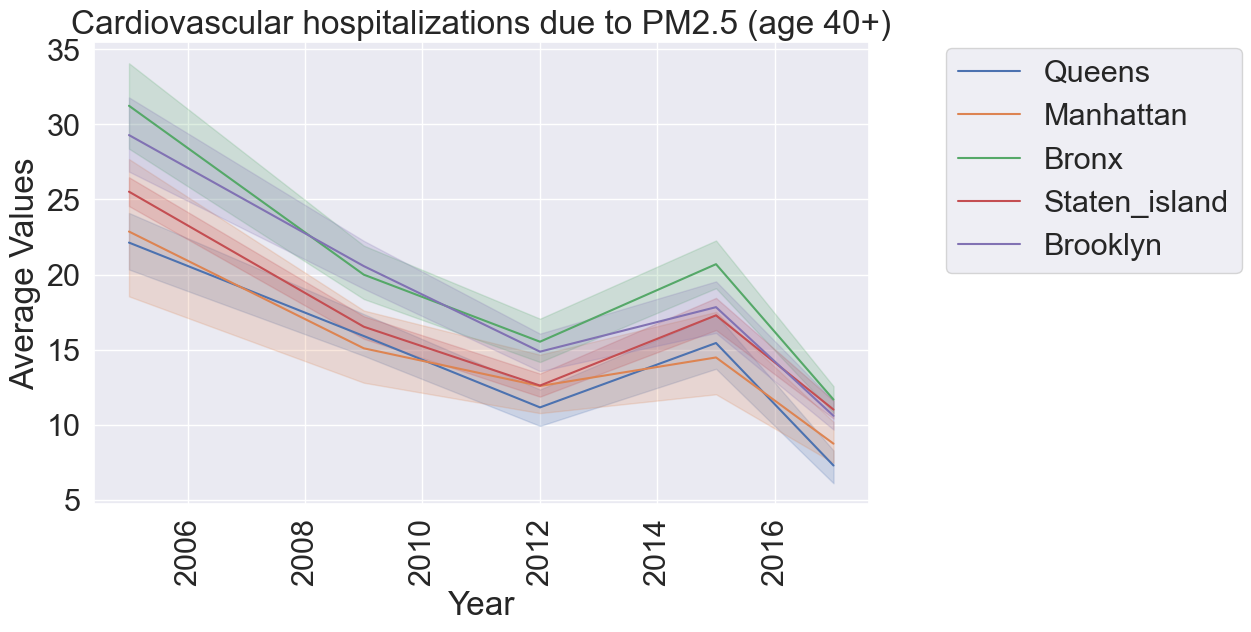

In [68]:
# visualize the trend of  Cardiovascular hospitalizations due to PM2.5 (age 40+) in each borough
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Borough_name', data=cardio_hos_fine_40)
plt.title('Cardiovascular hospitalizations due to PM2.5 (age 40+)')
plt.xlabel('Year')
plt.ylabel('Average Values')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [69]:
#get the total number of Cardiovascular hospitalizations due to PM2.5 (age 40+) in each borough per Time period
cardio_fine_40 = cardio_hos_fine_40.groupby(['Name', 'Borough_name','Time Period'])['Data Value'].sum().sort_values(ascending=False).reset_index()
cardio_fine_40

,Name,Borough_name,Time Period,Data Value
0,Cardiovascular hospitalizations due to PM2.5 (...,Brooklyn,2005-2007,351.5
1,Cardiovascular hospitalizations due to PM2.5 (...,Bronx,2005-2007,281.2
2,Cardiovascular hospitalizations due to PM2.5 (...,Manhattan,2005-2007,251.5
3,Cardiovascular hospitalizations due to PM2.5 (...,Brooklyn,2009-2011,246.7
4,Cardiovascular hospitalizations due to PM2.5 (...,Queens,2005-2007,243.4
5,Cardiovascular hospitalizations due to PM2.5 (...,Brooklyn,2015-2017,213.9
6,Cardiovascular hospitalizations due to PM2.5 (...,Bronx,2015-2017,186.2
7,Cardiovascular hospitalizations due to PM2.5 (...,Bronx,2009-2011,179.9
8,Cardiovascular hospitalizations due to PM2.5 (...,Brooklyn,2012-2014,178.3
9,Cardiovascular hospitalizations due to PM2.5 (...,Queens,2009-2011,174.9


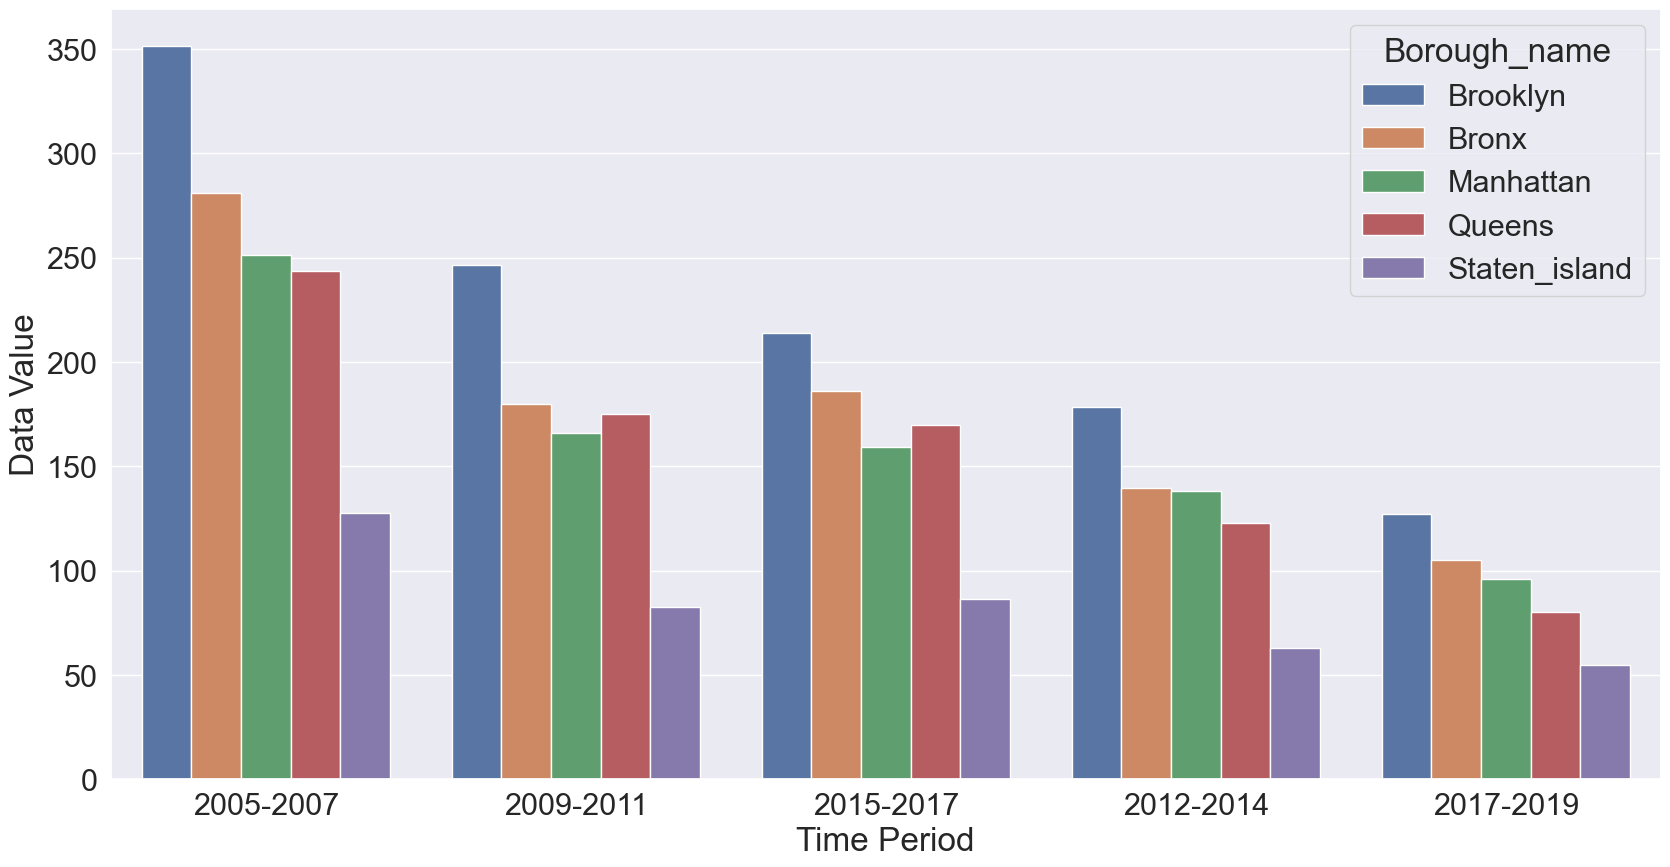

In [70]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x='Time Period', y='Data Value',hue = "Borough_name",  data=cardio_fine_40)
plt.xticks(rotation=0)
plt.show;

In [71]:
# get the total number of Cardiovascular hospitalizations due to PM2.5 (age 40+) in each borough over the years
cardio_hos_fine_40.groupby(['Name', 'Borough_name'])['Data Value'].sum().sort_values(ascending=False).reset_index()

,Name,Borough_name,Data Value
0,Cardiovascular hospitalizations due to PM2.5 (...,Brooklyn,1117.4
1,Cardiovascular hospitalizations due to PM2.5 (...,Bronx,892.0
2,Cardiovascular hospitalizations due to PM2.5 (...,Manhattan,810.9
3,Cardiovascular hospitalizations due to PM2.5 (...,Queens,790.7
4,Cardiovascular hospitalizations due to PM2.5 (...,Staten_island,414.6


<b> Insight
* Cardiovascular hospitalizations due to PM2.5 (age 40+) for all boroughs was in decline until 2012 when it started going up, peaked in 2015 and started declining.


<br/>

### Respiratory hospitalizations due to PM2.5 (age 20+)

In [72]:
# extract records of Respiratory hospitalizations due to PM2.5 (age 20+)
cardio_hos_fine_20 = annual_avg_impact[annual_avg_impact['Name']=='Respiratory hospitalizations due to PM2.5 (age 20+)']
cardio_hos_fine_20.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
687,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,307.0,Gramercy Park - Murray Hill,2012-2014,2012-01-02,8.9,2012,Manhattan
688,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,207.0,East Flatbush - Flatbush,2009-2011,2009-01-01,10.5,2009,Brooklyn
689,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,308.0,Greenwich Village - SoHo,2012-2014,2012-01-02,5.3,2012,Manhattan
690,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",UHF42,408.0,Jamaica,2015-2017,2015-01-01,10.5,2015,Queens
702,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",Borough,1.0,Bronx,2015-2017,2015-01-01,19.6,2015,Bronx


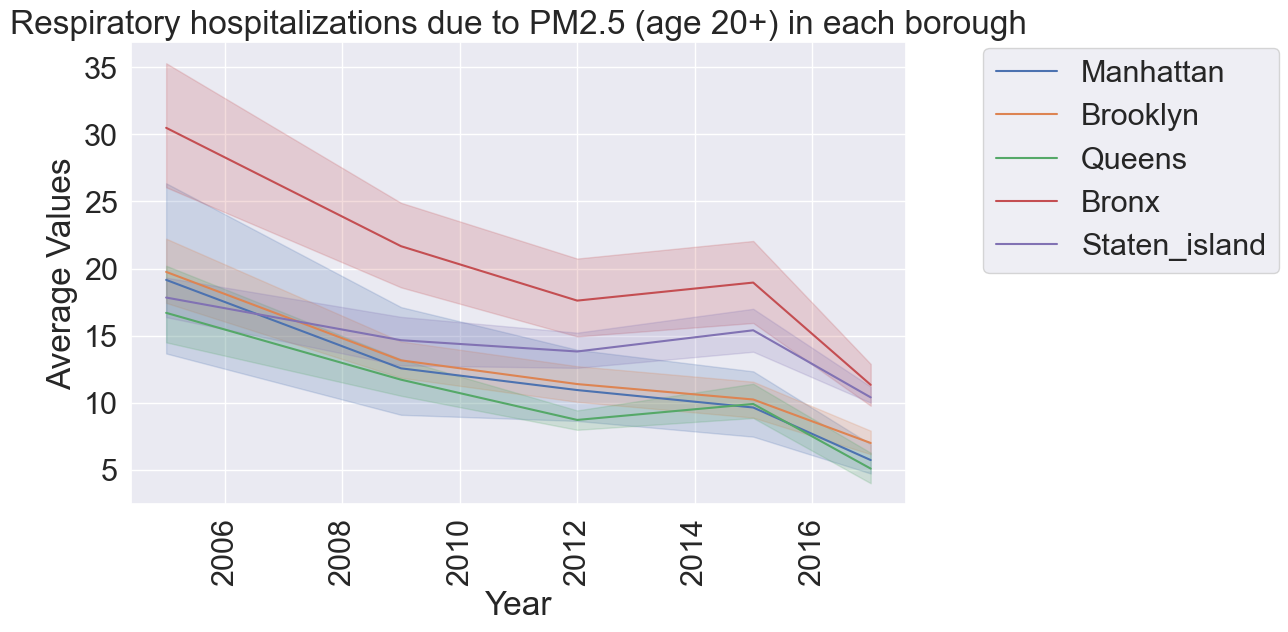

In [73]:
# visualize the trend of  Respiratory hospitalizations due to PM2.5 (age 20+) in each borough
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Borough_name', data=cardio_hos_fine_20)
plt.title('Respiratory hospitalizations due to PM2.5 (age 20+) in each borough')
plt.xlabel('Year')
plt.ylabel('Average Values')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [74]:
#get the total number of Respiratory hospitalizations due to PM2.5 (age 20+) in each borough per Time period
cardio_fine_20 = cardio_hos_fine_20.groupby(['Name', 'Borough_name','Time Period'])['Data Value'].sum().sort_values(ascending=False).reset_index()
cardio_fine_20

,Name,Borough_name,Time Period,Data Value
0,Respiratory hospitalizations due to PM2.5 (age...,Bronx,2005-2007,274.4
1,Respiratory hospitalizations due to PM2.5 (age...,Brooklyn,2005-2007,237.0
2,Respiratory hospitalizations due to PM2.5 (age...,Manhattan,2005-2007,210.7
3,Respiratory hospitalizations due to PM2.5 (age...,Bronx,2009-2011,195.0
4,Respiratory hospitalizations due to PM2.5 (age...,Queens,2005-2007,183.7
5,Respiratory hospitalizations due to PM2.5 (age...,Bronx,2015-2017,170.6
6,Respiratory hospitalizations due to PM2.5 (age...,Bronx,2012-2014,158.5
7,Respiratory hospitalizations due to PM2.5 (age...,Brooklyn,2009-2011,157.9
8,Respiratory hospitalizations due to PM2.5 (age...,Manhattan,2009-2011,138.2
9,Respiratory hospitalizations due to PM2.5 (age...,Brooklyn,2012-2014,136.7


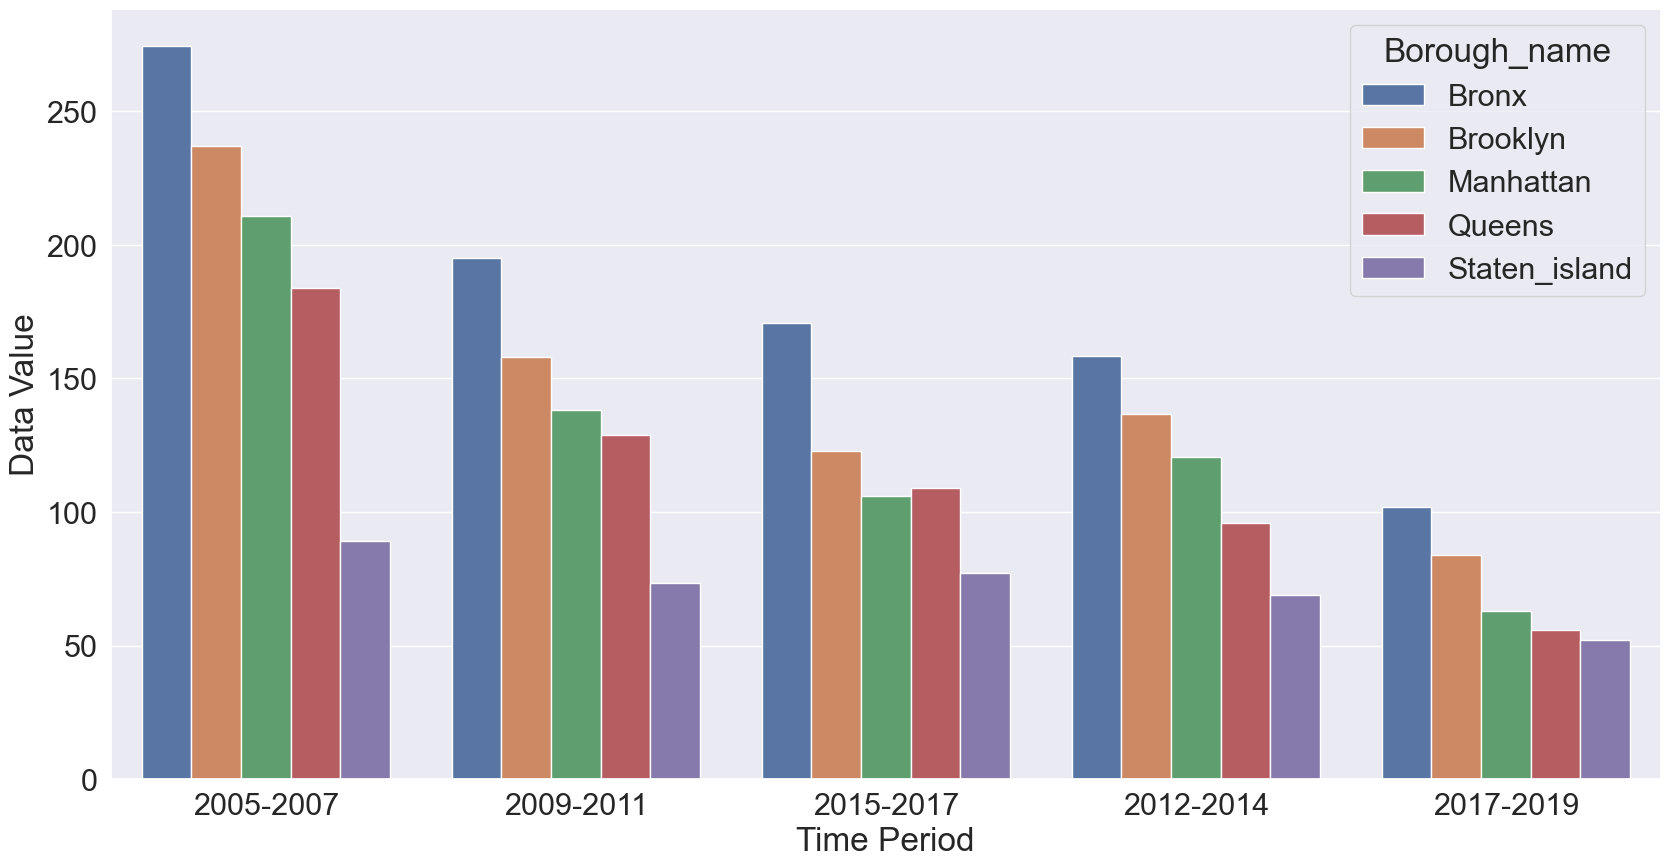

In [75]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x='Time Period', y='Data Value',hue = "Borough_name",  data=cardio_fine_20)
plt.xticks(rotation=0)
plt.show;

In [76]:
# get the total number of Respiratory hospitalizations due to PM2.5 (age 20+) in each borough over the years
cardio_hos_fine_20.groupby(['Name', 'Borough_name'])['Data Value'].sum().sort_values(ascending=False).reset_index()


,Name,Borough_name,Data Value
0,Respiratory hospitalizations due to PM2.5 (age...,Bronx,900.5
1,Respiratory hospitalizations due to PM2.5 (age...,Brooklyn,738.5
2,Respiratory hospitalizations due to PM2.5 (age...,Manhattan,638.4
3,Respiratory hospitalizations due to PM2.5 (age...,Queens,573.5
4,Respiratory hospitalizations due to PM2.5 (age...,Staten_island,360.6


<br/>

### Deaths due to PM2.5

In [77]:
# extract records of Deaths due to PM2.5
death_fine = annual_avg_impact[annual_avg_impact['Name']=='Deaths due to PM2.5']
death_fine.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Start_year,Borough_name
10100,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,106.0,High Bridge - Morrisania,2017-2019,2017-01-01,37.0,2017,Bronx
10101,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,309.0,Union Square - Lower East Side,2017-2019,2017-01-01,42.0,2017,Manhattan
10102,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,210.0,Coney Island - Sheepshead Bay,2005-2007,2005-01-01,83.3,2005,Brooklyn
10103,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",Borough,3.0,Manhattan,2015-2017,2015-01-01,38.0,2015,Manhattan
10122,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,305.0,Upper East Side,2017-2019,2017-01-01,32.0,2017,Manhattan


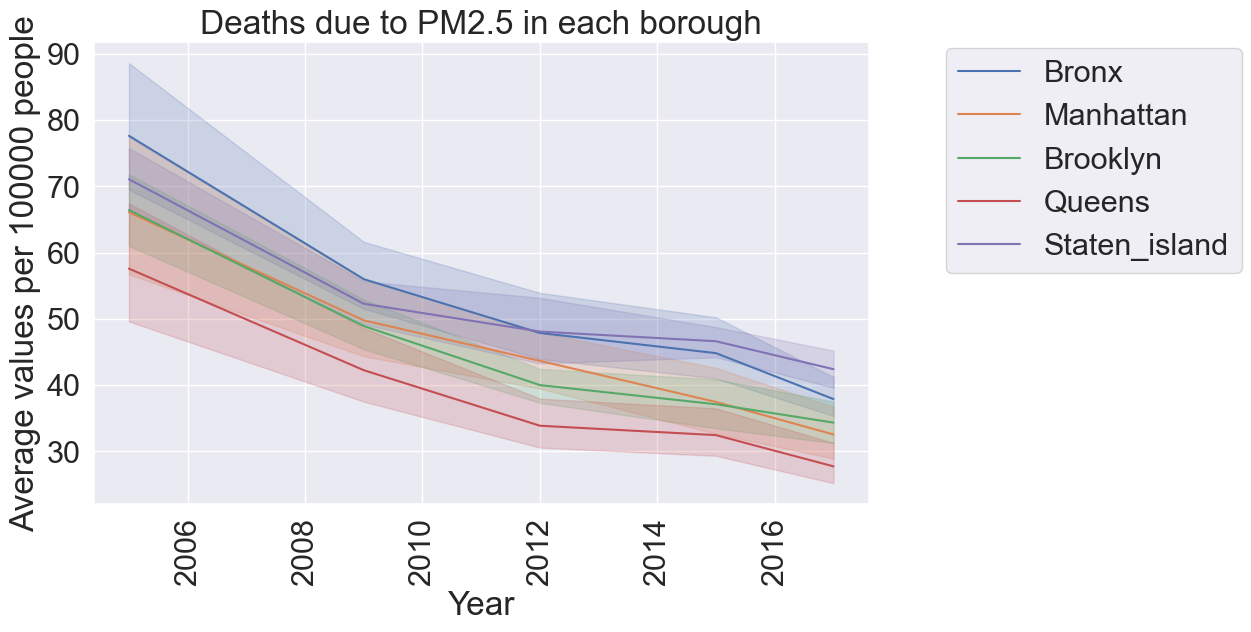

In [78]:
# visualize the trend of  Deaths due to PM2.5 in each borough
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Data Value', hue='Borough_name', data=death_fine)
plt.title('Deaths due to PM2.5 in each borough')
plt.xlabel('Year')
plt.ylabel('Average values per 100000 people')
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.5))
plt.tight_layout
plt.show()

In [79]:
death_fine_grp = death_fine.groupby(['Name', 'Borough_name','Time Period'])['Data Value'].sum().reset_index()
death_fine_grp

,Name,Borough_name,Time Period,Data Value
0,Deaths due to PM2.5,Bronx,2005-2007,698.7
1,Deaths due to PM2.5,Bronx,2009-2011,503.9
2,Deaths due to PM2.5,Bronx,2012-2014,430.8
3,Deaths due to PM2.5,Bronx,2015-2017,403.4
4,Deaths due to PM2.5,Bronx,2017-2019,341.0
5,Deaths due to PM2.5,Brooklyn,2005-2007,797.1
6,Deaths due to PM2.5,Brooklyn,2009-2011,586.9
7,Deaths due to PM2.5,Brooklyn,2012-2014,480.0
8,Deaths due to PM2.5,Brooklyn,2015-2017,445.3
9,Deaths due to PM2.5,Brooklyn,2017-2019,412.0


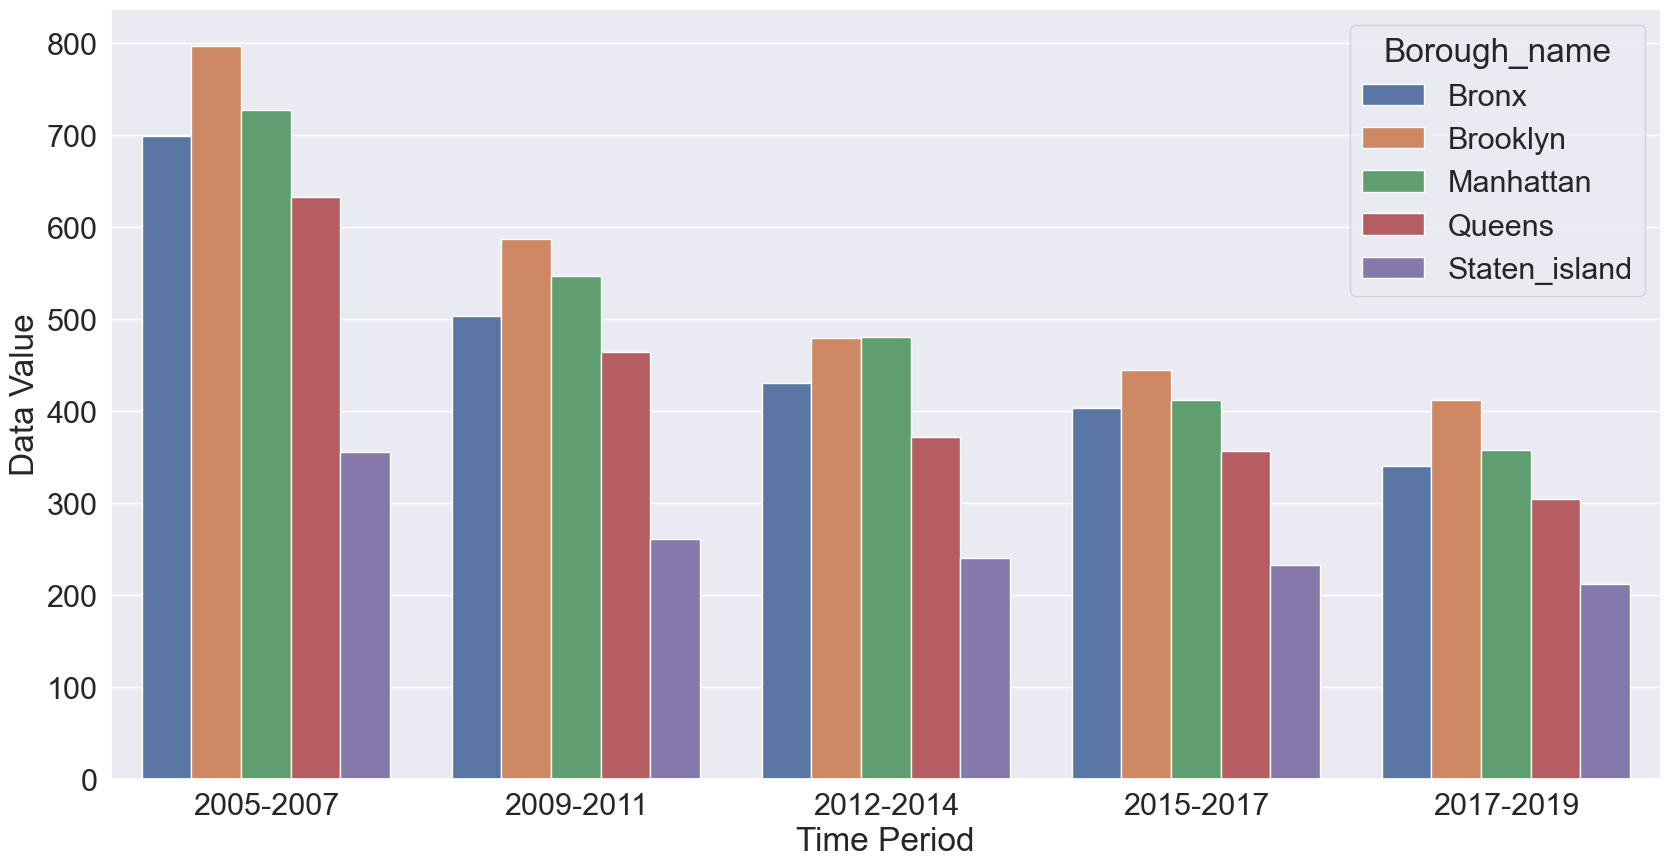

In [80]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x='Time Period', y='Data Value',hue = "Borough_name",  data=death_fine_grp)
plt.xticks(rotation=0)
plt.show;

In [81]:
# get the total number of Deaths due to PM2.5 in each borough over the years
death_fine.groupby(['Name', 'Borough_name'])['Data Value'].sum().sort_values(ascending=False).reset_index()

,Name,Borough_name,Data Value
0,Deaths due to PM2.5,Brooklyn,2721.3
1,Deaths due to PM2.5,Manhattan,2524.7
2,Deaths due to PM2.5,Bronx,2377.8
3,Deaths due to PM2.5,Queens,2132.5
4,Deaths due to PM2.5,Staten_island,1302.3


<b> Insight
* Deaths due to PM2.5 was on steady decline for all boroughs within the time period
* Total Deaths due to PM2.5 was almost evenly distributed across boroughs except Staten_Island.
* The highest total Deaths due to PM2.5 was in Brooklyn and lowest in Staten_Island within the period

<br/>

<br/>

# Conclusions

* The major air pollutants impacting air quality and health in New York are Nitrogen dioxide(NO2), Fine Particles(PM 2.5) and
Ozone (O3)

<b> Air pollutants across seasons:

* There is no clear pattern between Ozone level and seasons but most of its low levels are during the winter
* For Nitrogen dioxide, it records high values during the winter and low values during summer. <br/> 
Before 2021 summer, 2020 summer recorded its lowest value.
* There are no clear pattern between fine particles and the seasons


<b> Air pollutants across time and boroughs:

* There is a steady decline in the levels(values) of the pollutants from 2005 to 2022
* The annual average levels(values) of Nitrogen dioxide in New York steadily declined from 25.75ppb to 16.05ppb from 2008 to 2022.
* The 2022 annual average of NO2 is higher than the current WHO recommended threshold of 10ppb
* Overall there is a steady decline in the levels of Nitrogen Dioxide(NO2) across boroughs.
* The average levels of NO2 remained lowest in Staten_island and highest in Bronx and Manhattan.
<br/>
<br/>
* There is a steady decline in annual average levels(values) of PM 2.5 in New York<br/> from 10.99mcg/m3 in 2008 to 6.07mcg/m3 in 2022
* There is a an observable steady decline in the levels of PM 2.5 in all the boroughs.
* The average levels of PM 2.5 remained lowest in Staten_island and highest in Bronx followed by Manhattan.
* The 2022 annual average of PM 2.5 is higher than the current WHO recommended threshold of 5mcg/m3
<br/>
<br/>
* The seasonal average values of Ozone have been fluctuating in between 25ppb and 34ppb from 2009 to 2022<br/> with its highest level being 33.16ppb in 2022.
* There is no observable steady decline or increase in the levels of Ozone across boroughs.
* 2022 recorded the highest average values for all the boroughs with Steten_island being the highest


Air quality is best in Staten_Island and worst in Bronx

### Impacts

<b> 1. Emergency departments visits:

* Emergency departments visits due to the pollutants analyzed was on steady decline for all boroughs. The number of visits are highest in Bronx while the lowest in Staten_Island.

<b> 2. Hospitalizations:

* Though Hospitalization due to PM 2.5 for both age 40+ and 20-40year was on steady decline in all boroughs (with Staten_Island recording the lowest numbers), but the highest numbers for 40+ was in Brooklyn while for 20-40year was in Bronx. 
* Hospitalization due to  ozone was on steady decline for all boroughs. The number of hospitalizations are highest in Bronx while the lowest in Staten_Island.

<b>3. Deaths:

* Deaths due to PM 2.5 was on steady decline for all boroughs. The number of deaths are highest in Bronx while the lowest in Staten_Island while for ozone the highest daeths was recorded in Brooklyn

Air pollutants Impact are highest Bronx and lowest in Staten_Island